<a href="https://colab.research.google.com/github/NancyBudgujjar/Predective-Maintenance-IITD_FSM/blob/main/IITD_ML_05_FD003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/project/CMaps/train_FD003.txt',sep=" ",header=None)
df_test = pd.read_csv('/content/drive/MyDrive/project/CMaps/test_FD003.txt',sep=" ",header=None)
df_RUL = pd.read_csv('/content/drive/MyDrive/project/CMaps/RUL_FD003.txt',sep=" ",header=None)

In [4]:
df_train.shape

(24720, 28)

In [5]:
df_test.shape

(16596, 28)

In [6]:
df_RUL.shape

(100, 2)

In [7]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,NaN,NaN
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,NaN,NaN
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,NaN,NaN
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,NaN,NaN
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,NaN,NaN
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,NaN,NaN
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,NaN,NaN
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,NaN,NaN


In [8]:
df_test.head() # used to see the first five elements of the data.

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,NaN,NaN
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,NaN,NaN
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,NaN,NaN
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,NaN,NaN
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,NaN,NaN


In [9]:
df_RUL.head()

,0,1
0,44,NaN
1,51,NaN
2,27,NaN
3,120,NaN
4,101,NaN


In [10]:
df_train.drop(columns=[26, 27], inplace=True)
df_test.drop(columns=[26, 27], inplace=True)
df_RUL.drop(columns=[1],inplace=True)

In [11]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio) (P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

col_names = index_names + setting_names + sensor_names

The dataset FD001 contains time series of 21 sensors and 3 settings of 100 units(turbofan engine).Each engine works normally at the beginning of each time series and fails at the end of the time series. Each row is a snapshot of the data taken during a single operation cycle.

In [12]:
df_train.columns = col_names
df_test.columns = col_names
df_train

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,519.66,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,519.91,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,519.44,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,520.01,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753


In [13]:
df_train.describe()  # used to generating descriptive statistics

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
count,24720.000000,24720.000000,24720.000000,24720.000000,24720.0,24720.00,24720.000000,24720.000000,24720.000000,2.472000e+04,...,24720.000000,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000
mean,48.631877,139.077063,-0.000024,0.000005,100.0,518.67,642.457858,1588.079175,1404.471212,1.462000e+01,...,523.050873,2388.071643,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024
std,29.348985,98.846675,0.002194,0.000294,0.0,0.00,0.523031,6.810418,9.773178,3.552786e-15,...,3.255314,0.158121,16.504118,0.060512,1.734759e-17,1.761459,0.0,0.0,0.248865,0.149234
min,1.000000,1.000000,-0.008600,-0.000600,100.0,518.67,640.840000,1564.300000,1377.060000,1.462000e+01,...,517.770000,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600
25%,23.000000,62.000000,-0.001500,-0.000200,100.0,518.67,642.080000,1583.280000,1397.187500,1.462000e+01,...,521.150000,2388.010000,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200
50%,47.000000,124.000000,-0.000000,-0.000000,100.0,518.67,642.400000,1587.520000,1402.910000,1.462000e+01,...,521.980000,2388.070000,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600
75%,74.000000,191.000000,0.001500,0.000300,100.0,518.67,642.790000,1592.412500,1410.600000,1.462000e+01,...,523.840000,2388.140000,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300
max,100.000000,525.000000,0.008600,0.000700,100.0,518.67,645.110000,1615.390000,1441.160000,1.462000e+01,...,537.400000,2388.610000,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500


In [14]:
df_train.info() # used to get concise summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   24720 non-null  int64  
 1   cycle                                    24720 non-null  int64  
 2   setting_1                                24720 non-null  float64
 3   setting_2                                24720 non-null  float64
 4   setting_3                                24720 non-null  float64
 5   (Fan inlet temperature) (◦R)             24720 non-null  float64
 6   (LPC outlet temperature) (◦R)            24720 non-null  float64
 7   (HPC outlet temperature) (◦R)            24720 non-null  float64
 8   (LPT outlet temperature) (◦R)            24720 non-null  float64
 9   (Fan inlet Pressure) (psia)              24720 non-null  float64
 10  (bypass-duct pressure) (psia)            24720

In [15]:
df_train.duplicated().sum() #used to check for duplicate values

0

In [16]:
df_train.isnull().sum() # used to get count of null values in dataset

engine                                     0
cycle                                      0
setting_1                                  0
setting_2                                  0
setting_3                                  0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio) (P50/P2)           0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

24720


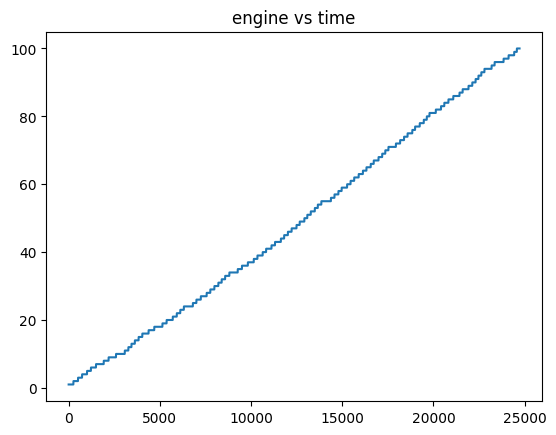

24720


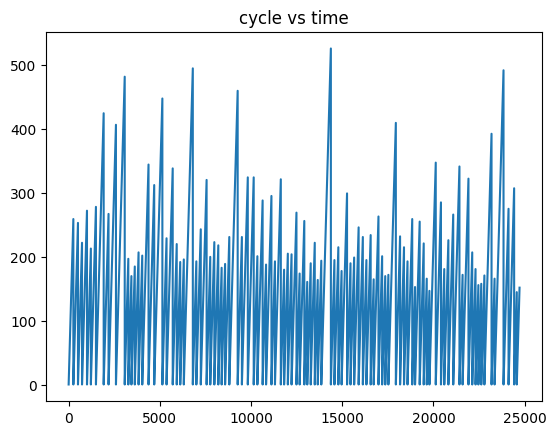

24720


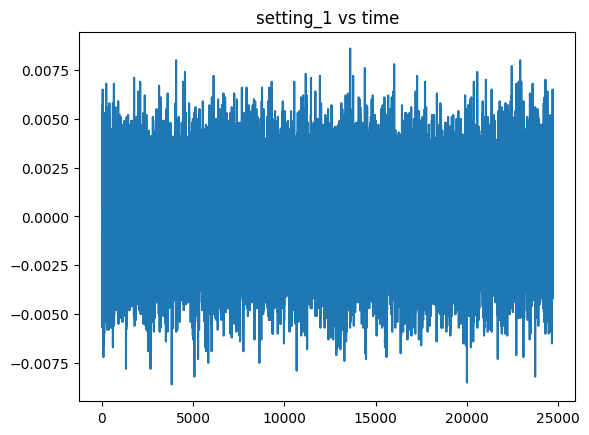

24720


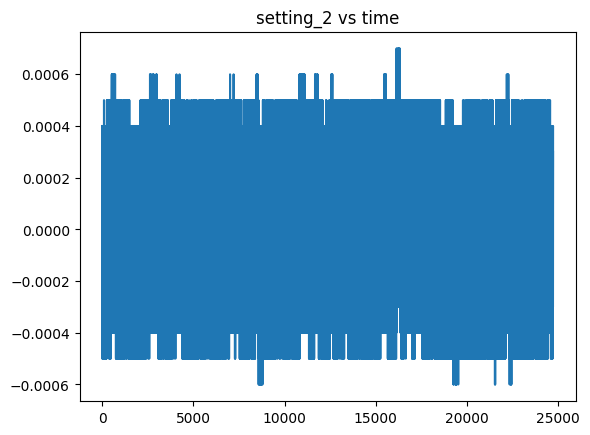

24720


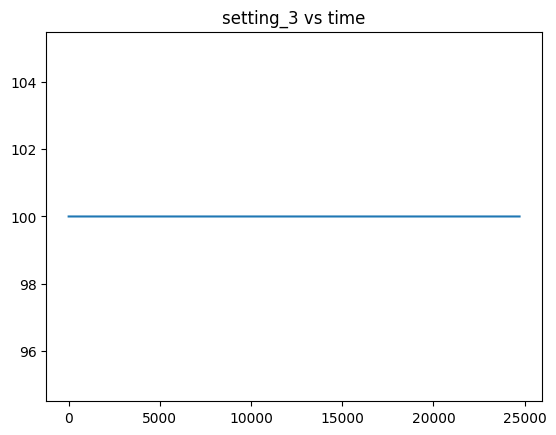

24720


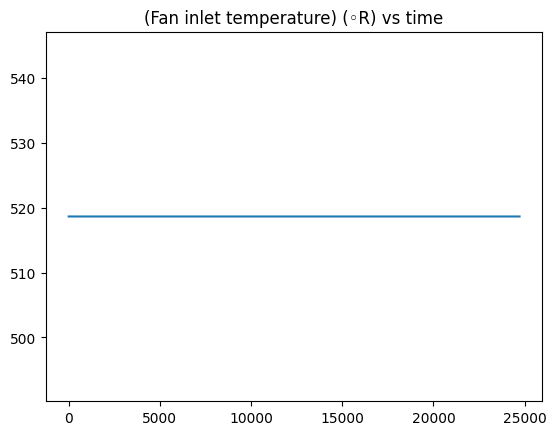

24720


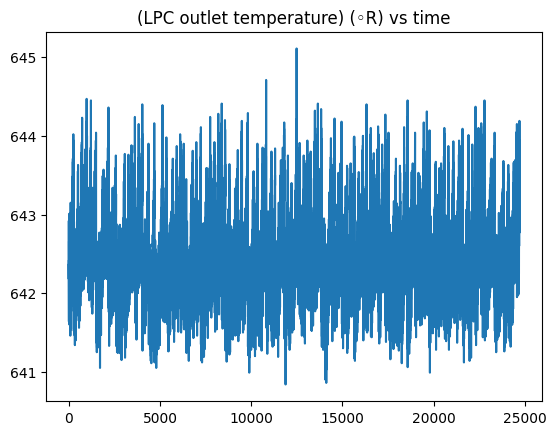

24720


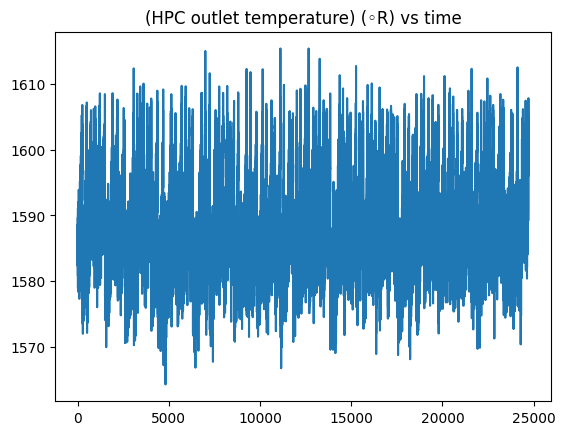

24720


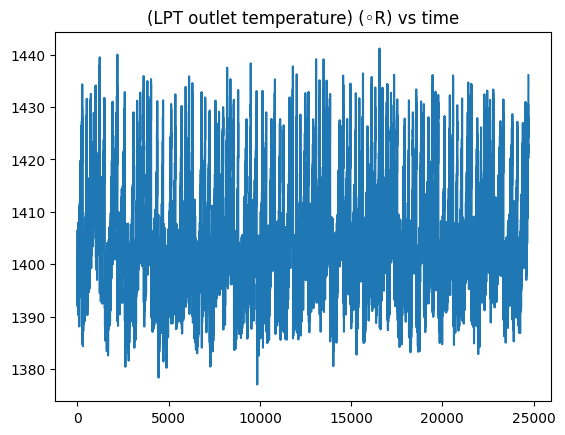

24720


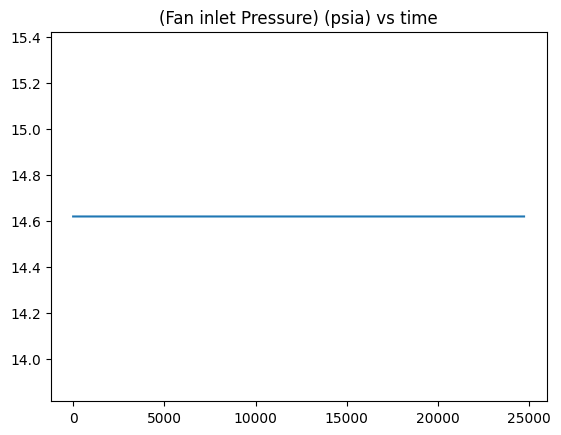

24720


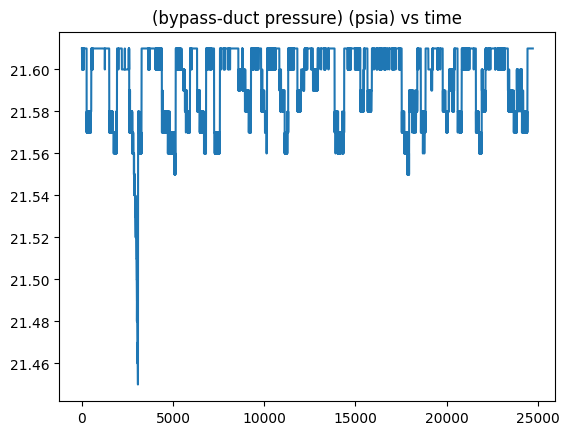

24720


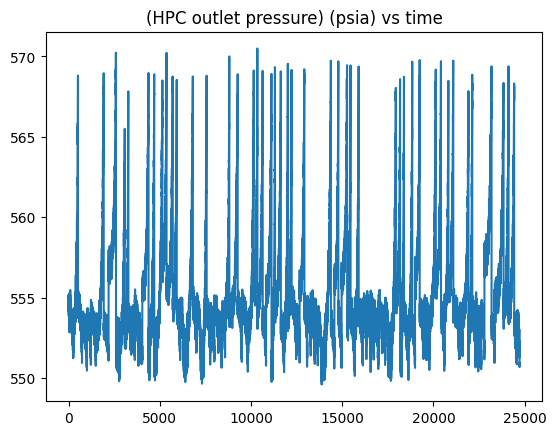

24720


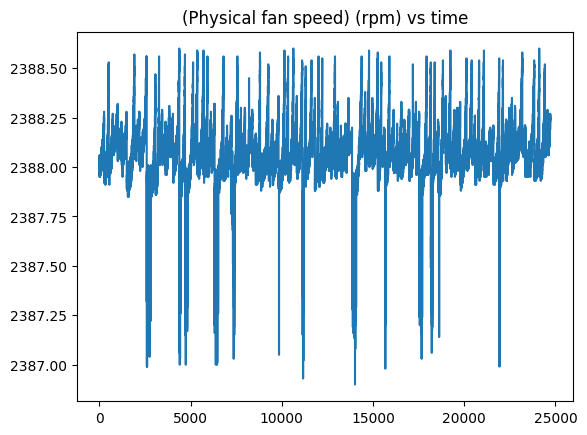

24720


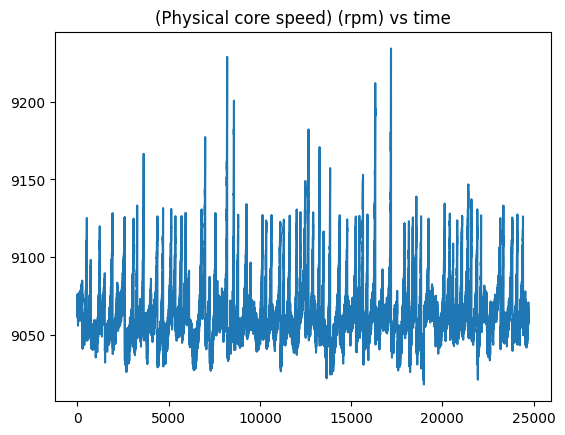

24720


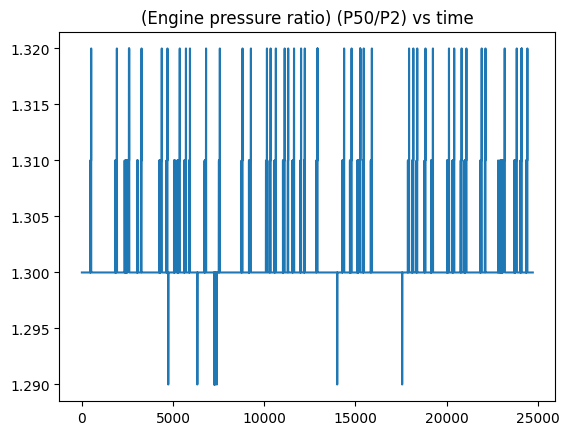

24720


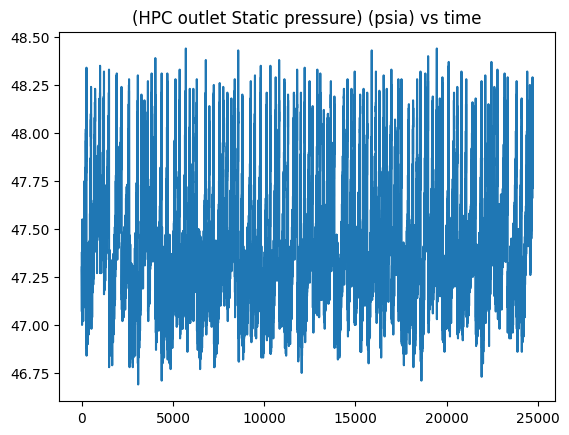

24720


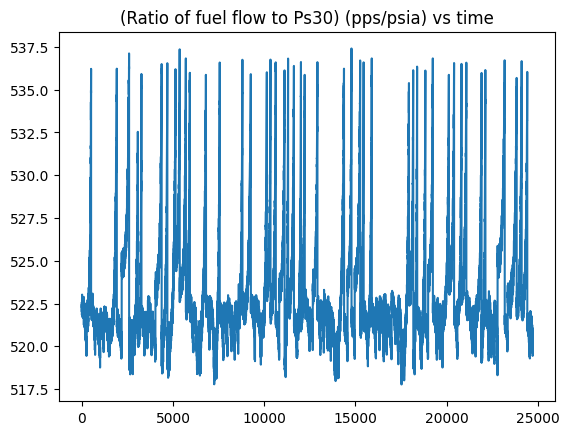

24720


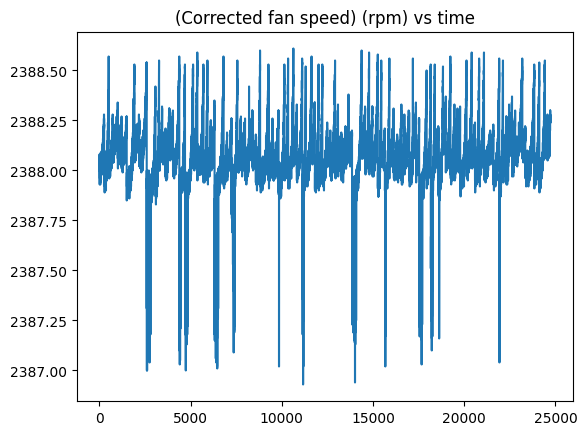

24720


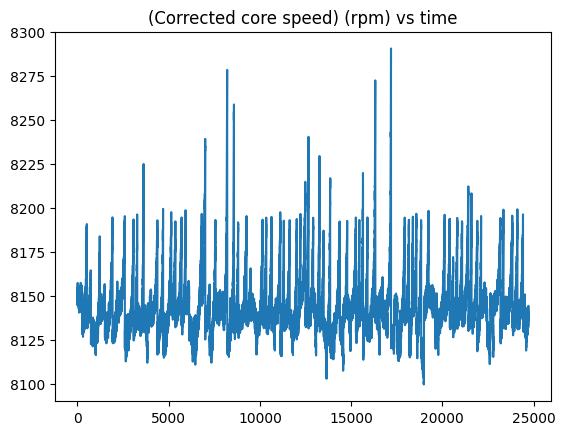

24720


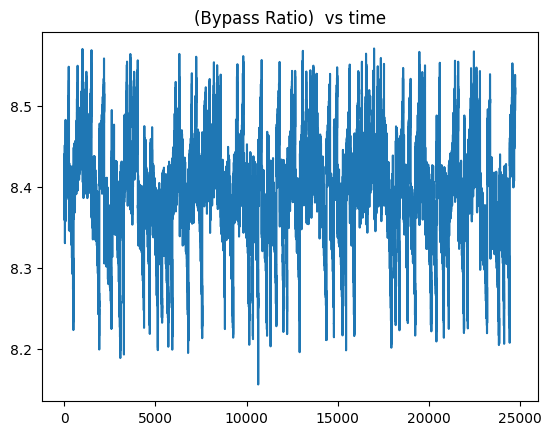

24720


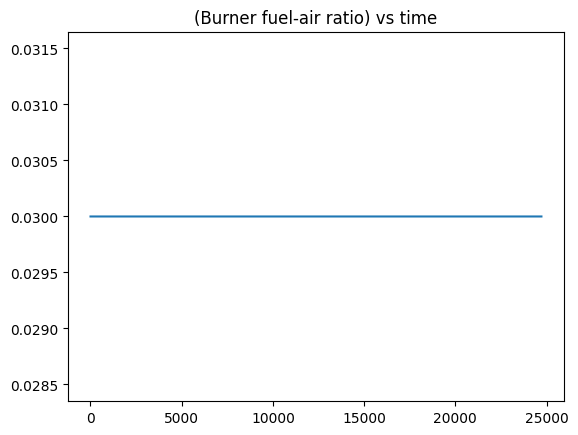

24720


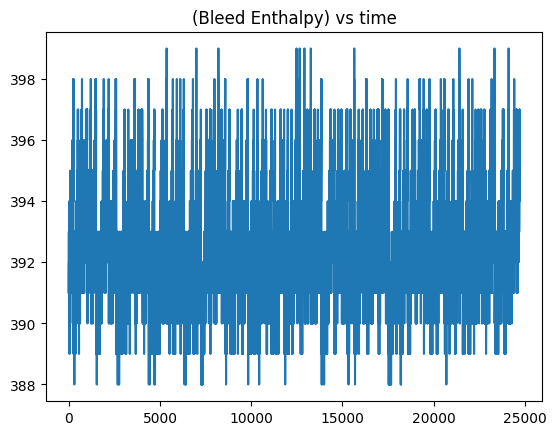

24720


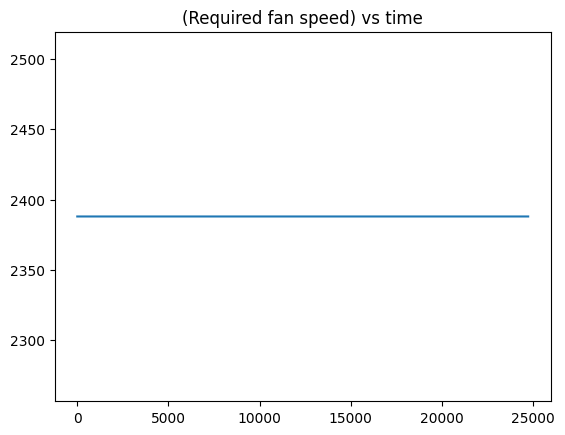

24720


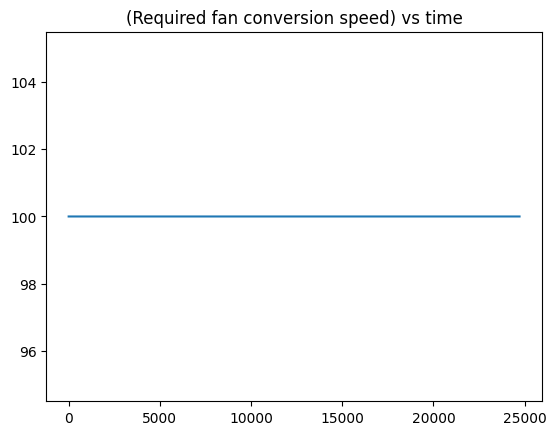

24720


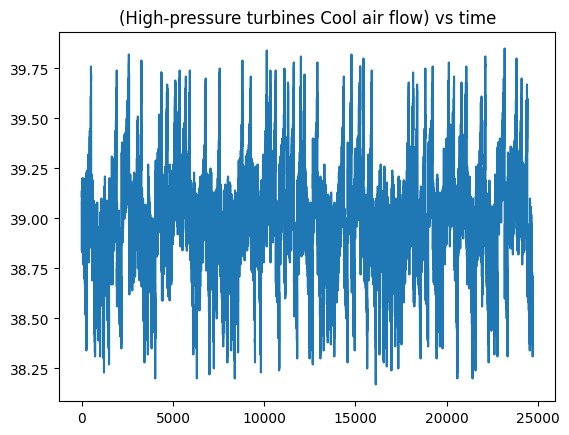

24720


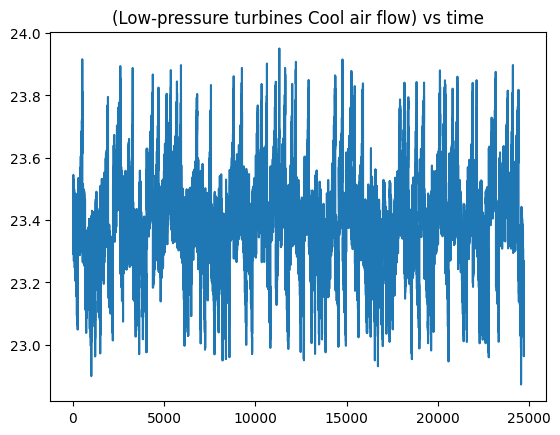

In [17]:
for i in col_names:
    print(len(df_train[i]))
    plt.plot(range(1, len(df_train[i])+1), df_train[i].to_numpy())
    plt.title(i+" vs time")
    plt.show()

In [18]:
df_train.nunique() # used to get count of unique values in dataset

engine                                      100
cycle                                       525
setting_1                                   160
setting_2                                    14
setting_3                                     1
(Fan inlet temperature) (◦R)                  1
(LPC outlet temperature) (◦R)               334
(HPC outlet temperature) (◦R)              3358
(LPT outlet temperature) (◦R)              4383
(Fan inlet Pressure) (psia)                   1
(bypass-duct pressure) (psia)                17
(HPC outlet pressure) (psia)               1854
(Physical fan speed) (rpm)                  161
(Physical core speed) (rpm)                7114
(Engine pressure ratio) (P50/P2)              4
(HPC outlet Static pressure) (psia)         170
(Ratio of fuel flow to Ps30) (pps/psia)    1772
(Corrected fan speed) (rpm)                 163
(Corrected core speed) (rpm)               6320
(Bypass Ratio)                             3122
(Burner fuel-air ratio)                 

the columns which have only 1 unique value, i.e., the column value is constant and we can say it is not changing much. These column does not help in predicting the output.

In [19]:
# making a list of columns with 1 unique value
unwanted=[]
for i in df_train.select_dtypes(include=np.number):
    if df_train[i].nunique()==1:
        unwanted.append(i)
print(unwanted)

['setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']


In [20]:
#Drop the column with 1 unique value
df_train.drop(columns=unwanted, inplace=True)
df_train.shape

(24720, 20)

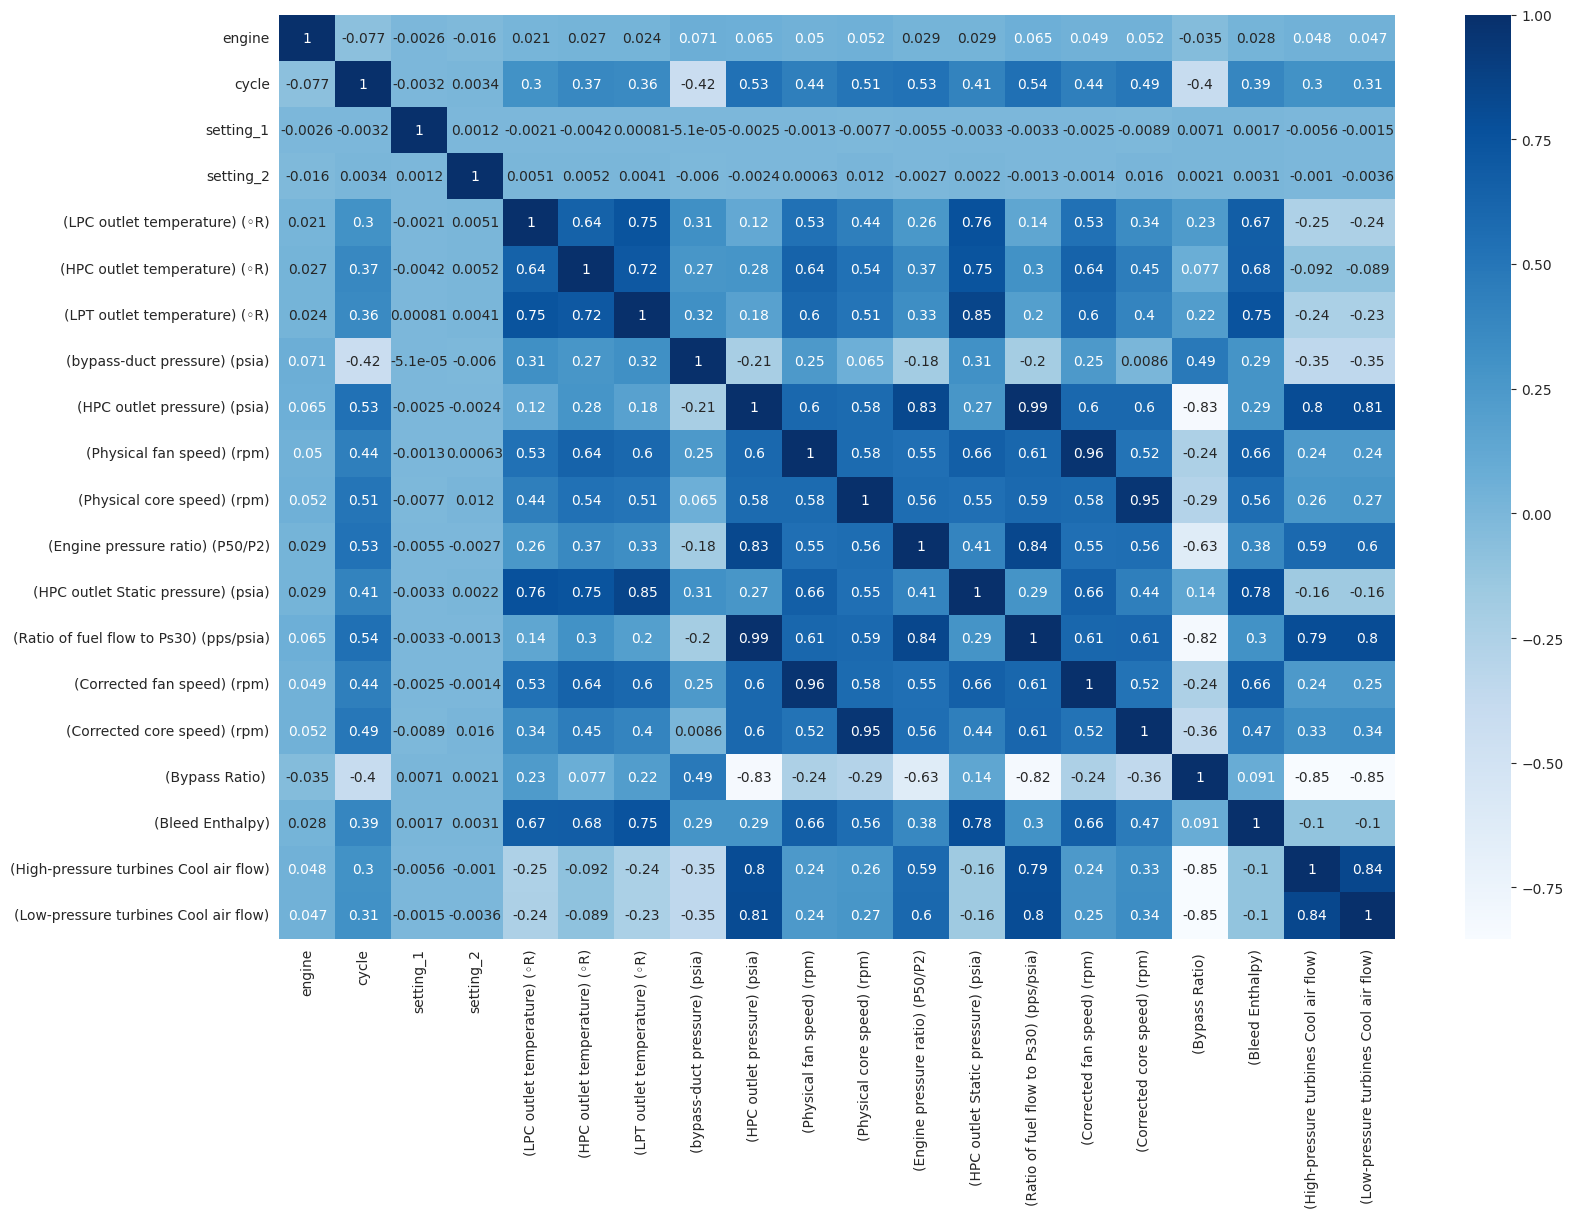

In [21]:
# correlation metrics
plt.figure(figsize=(18,12))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
plot_kws={"s": 1}
sns.heatmap(df_train.corr(), cmap='Blues', annot=True, linecolor='lightgrey').set_facecolor('white')

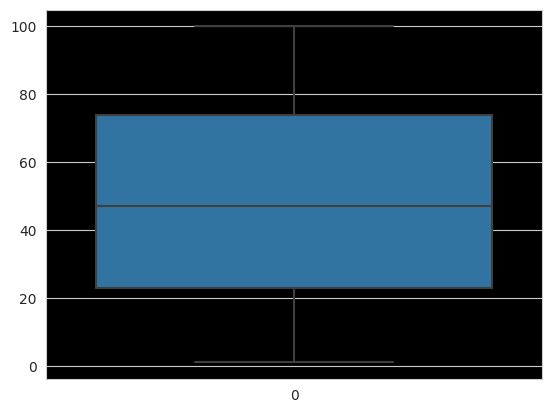

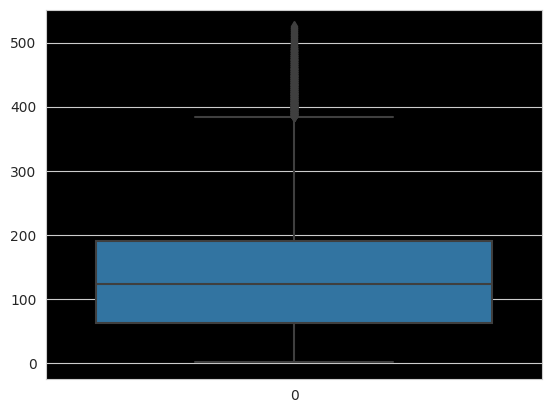

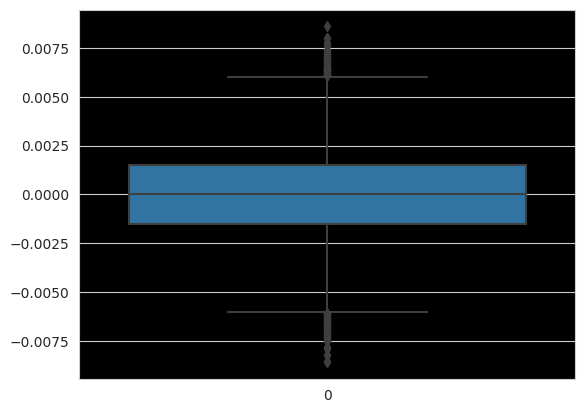

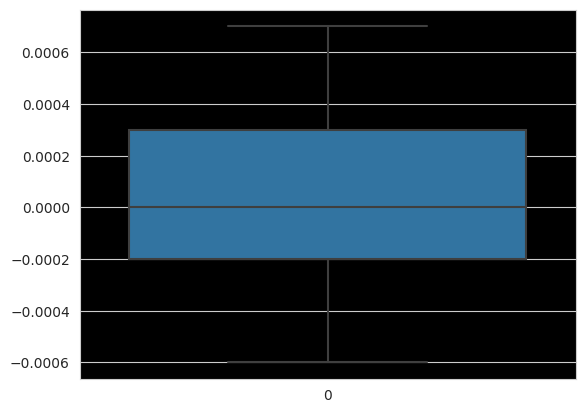

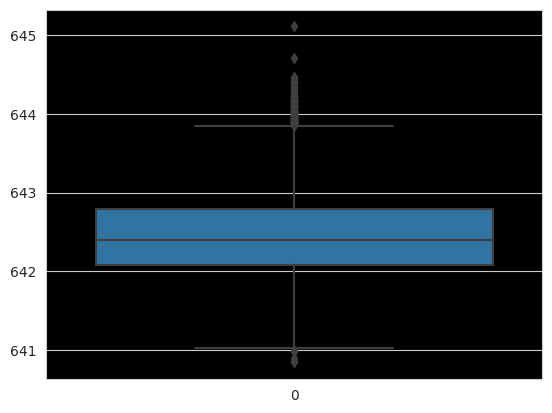

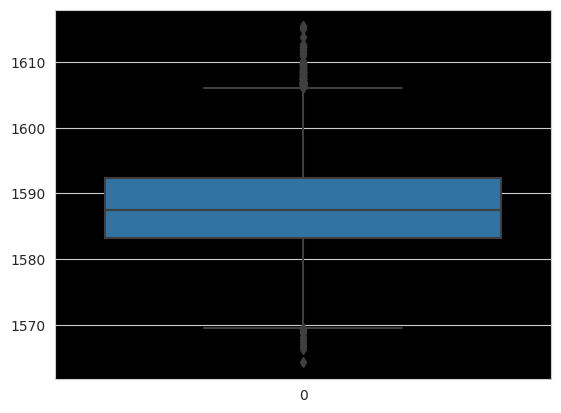

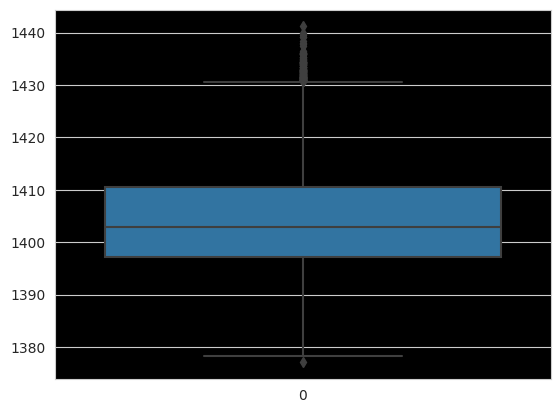

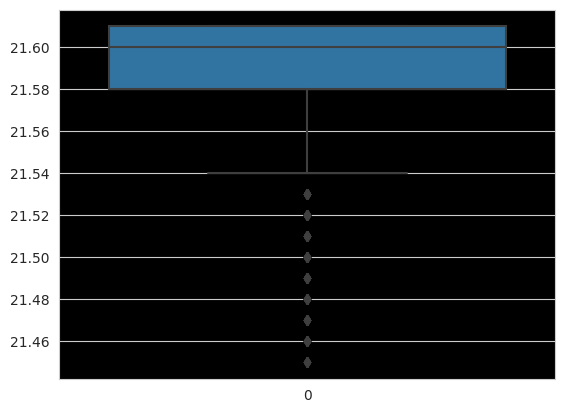

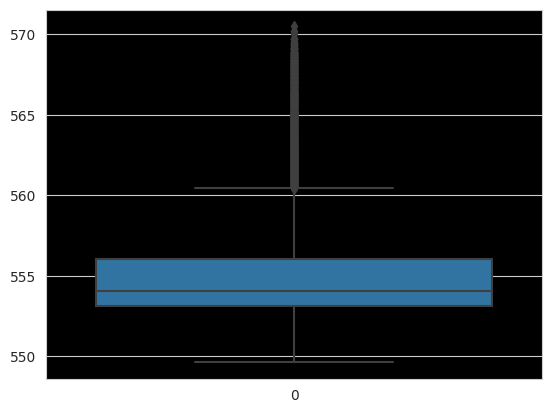

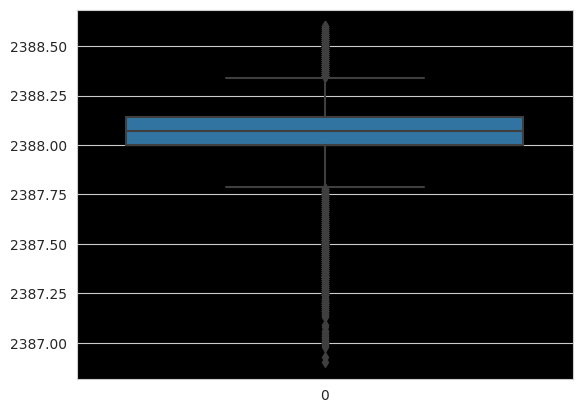

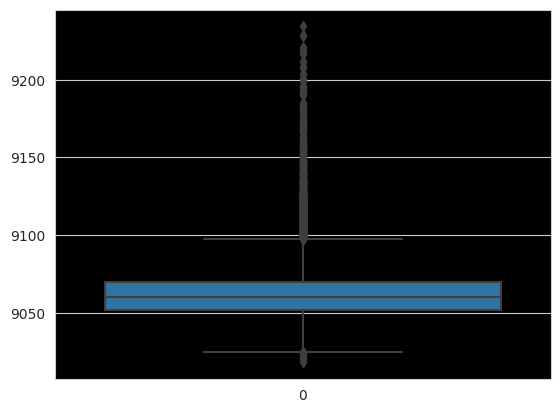

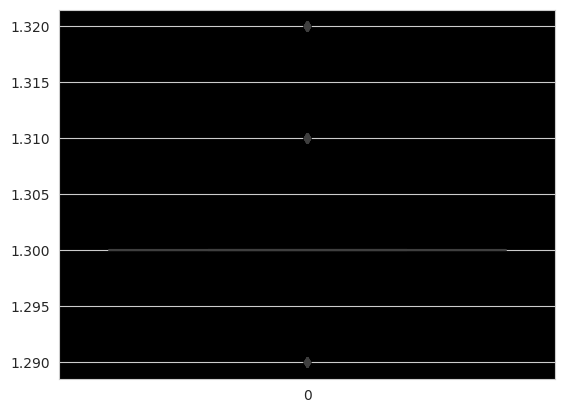

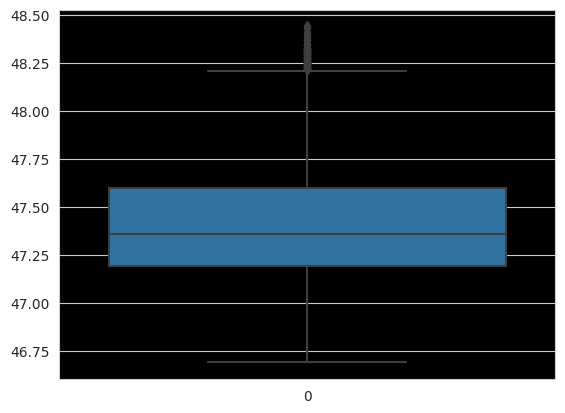

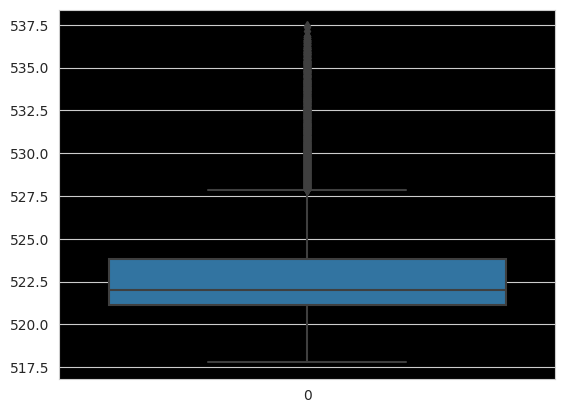

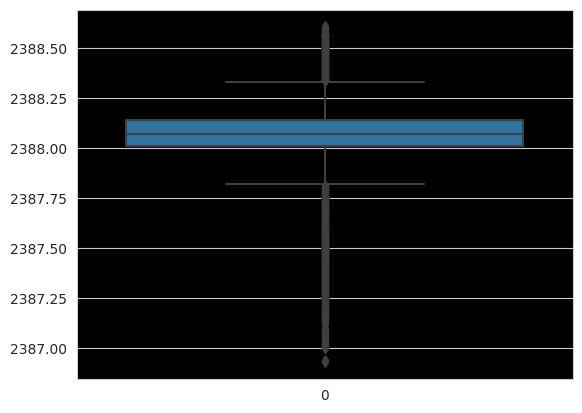

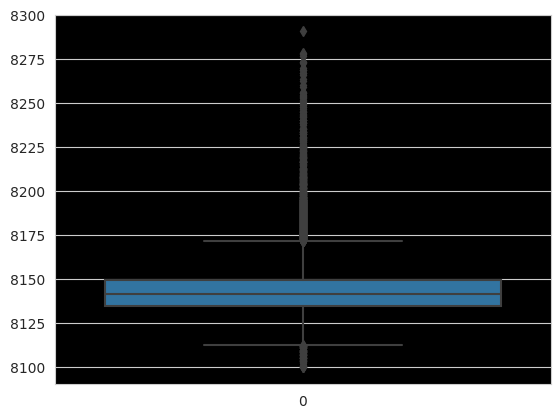

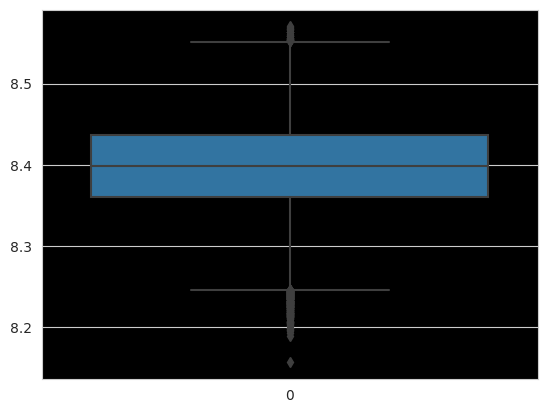

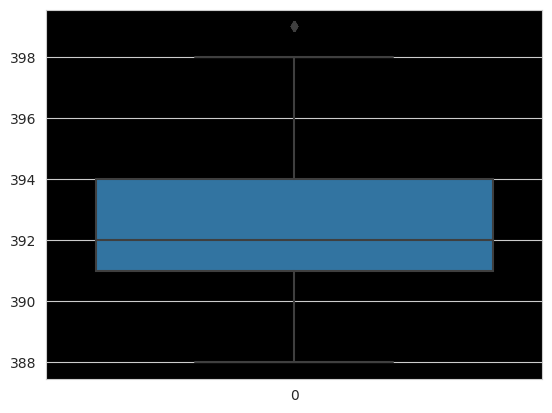

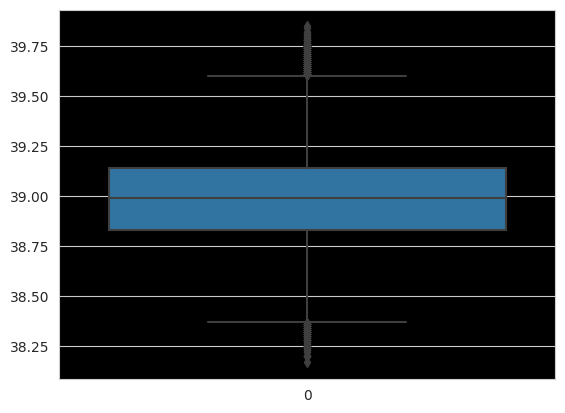

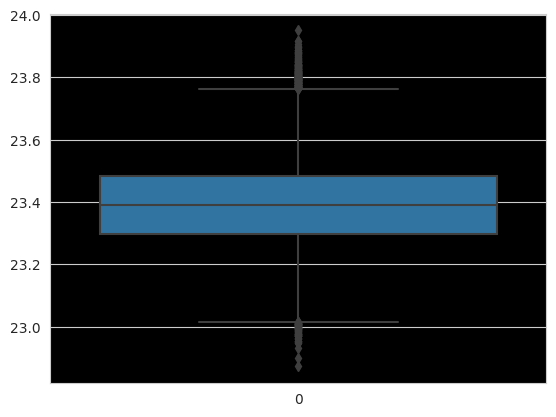

In [22]:
for i in df_train.select_dtypes(include=np.number):
  sns.boxplot(df_train[i])
  plt.show()

#Outler Detection and Treatment
bypass air:The ratio of the air that goes around the engine to the air that goes through the core is called the bypass ratio. A low pressure compressor (LPC) and high pressure compressor (HPC) supply compressed high temperature, high pressure gases to the combustor. Low pressure turbine (LPT) can decelerate and pressurize air to improve the chemical energy conversion efficiency of aviation kerosene. High pressure turbines (HPT) generate mechanical energy by using high temperature and high pressure gas strike turbine blades. Low-pressure rotor (N1), high-pressure rotor (N2), and nozzle guarantee the combustion efficiency of the engine.

In [23]:
df_train['(Engine pressure ratio) (P50/P2)'].unique()

array([1.3 , 1.31, 1.32, 1.29])

In [24]:
# how much percentage of the column have value of 1.3?
(((df_train['(Engine pressure ratio) (P50/P2)']==1.3).sum())/df_train.shape[0])*100

88.24433656957929

In [25]:
# how much percentage of the column have value of 1.31?
(((df_train['(Engine pressure ratio) (P50/P2)']==1.31).sum())/df_train.shape[0])*100

11.084142394822006

In [26]:
# how much percentage of the column have value of 1.32?
(((df_train['(Engine pressure ratio) (P50/P2)']==1.32).sum())/df_train.shape[0])*100

0.6351132686084142

In [27]:
# how much percentage of the column have value of 1.29?
(((df_train['(Engine pressure ratio) (P50/P2)']==1.29).sum())/df_train.shape[0])*100

0.03640776699029126

Majority of the value (88%) are 1.3. Also, 1.3, 1.31, 1.32, 1.29, these values are almost same. So we can say that the value is almost constant and we can drop this column

In [28]:
df_train.drop(['(Engine pressure ratio) (P50/P2)'],axis=1,inplace=True)

In [29]:
df_train.shape

(24720, 19)

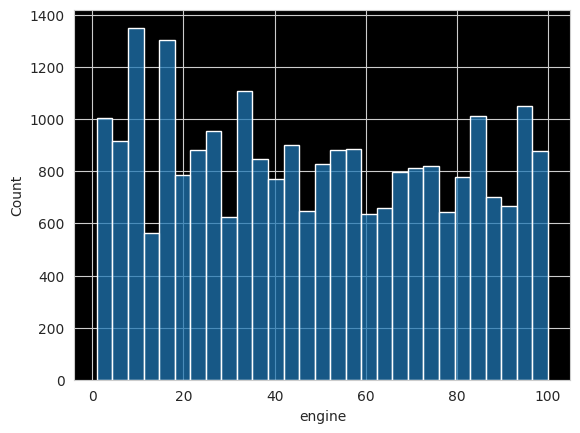

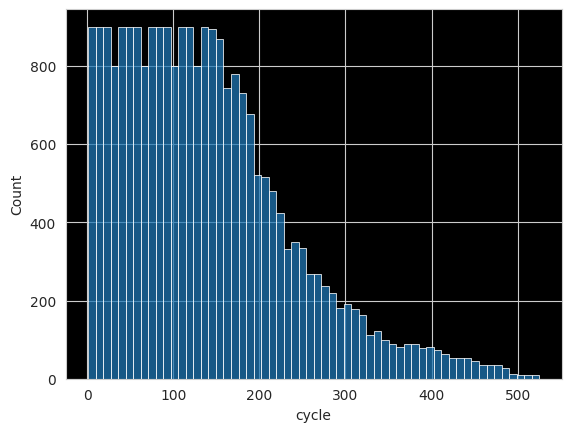

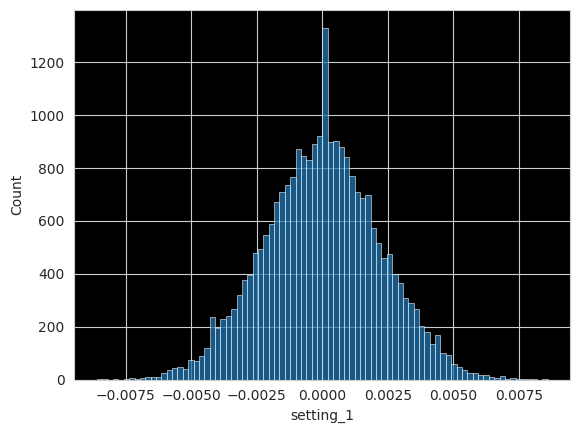

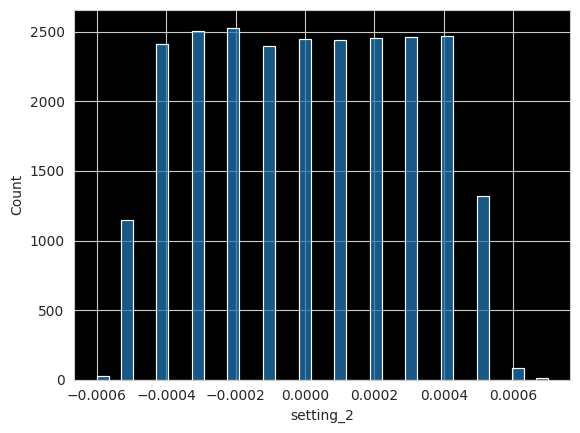

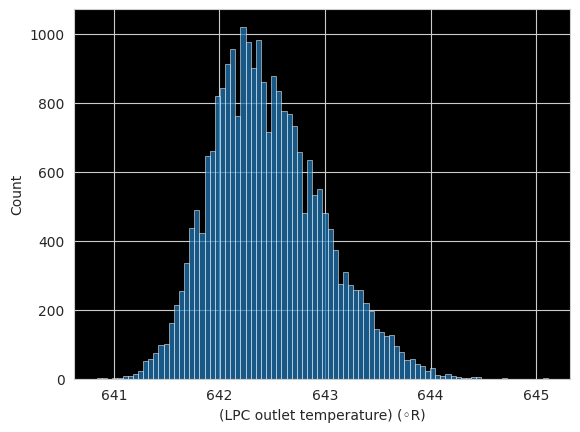

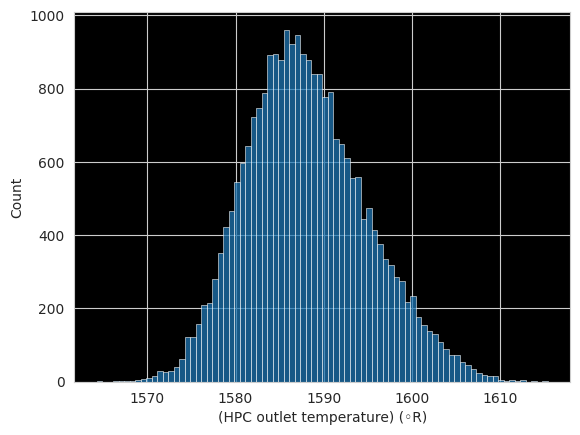

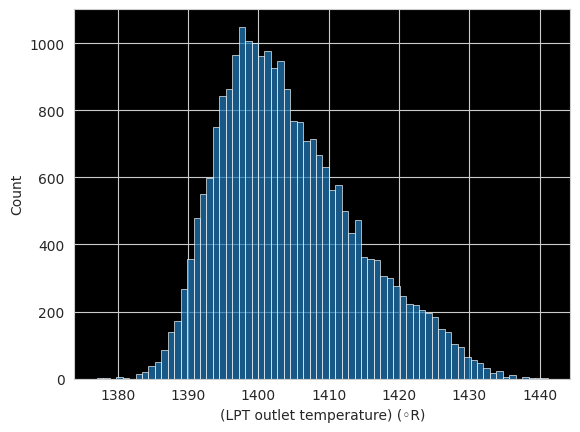

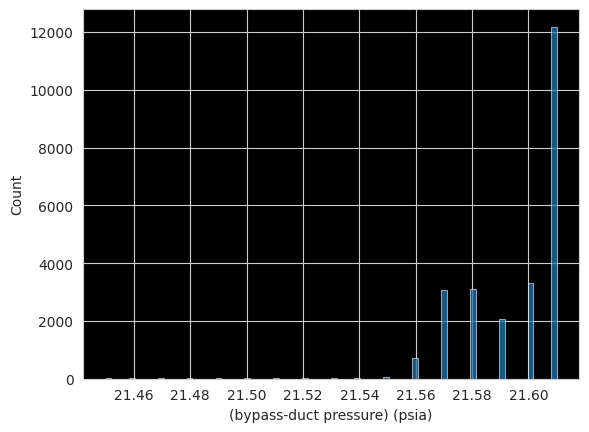

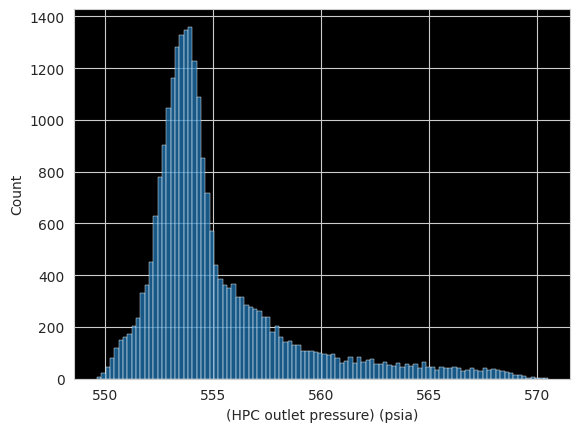

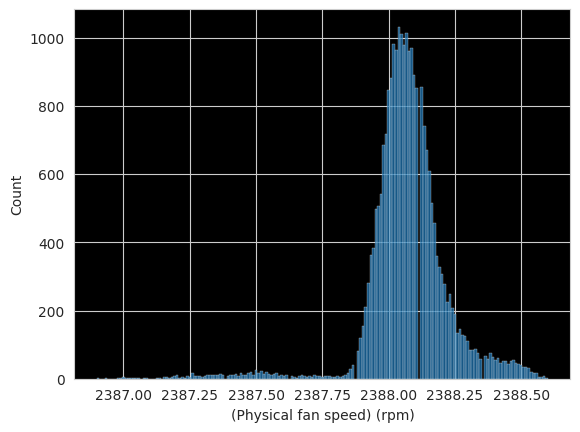

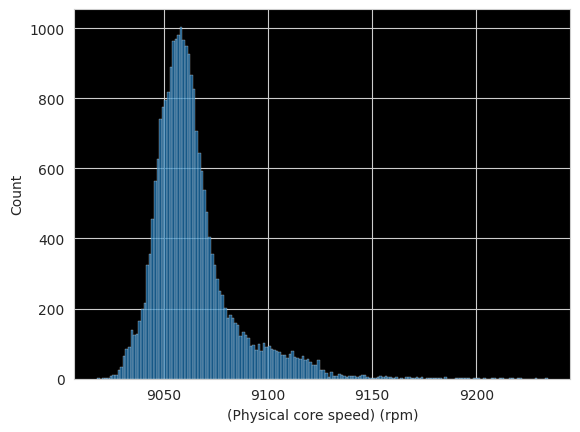

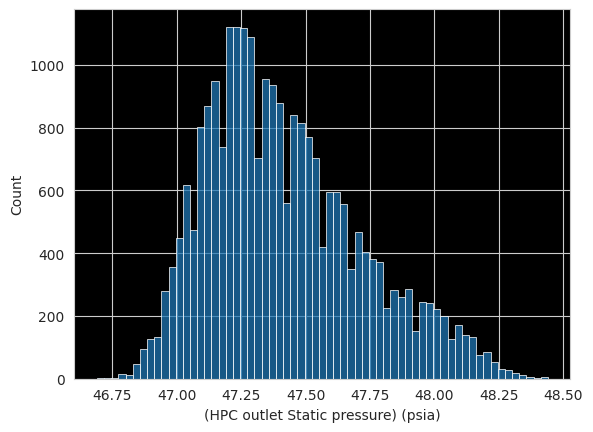

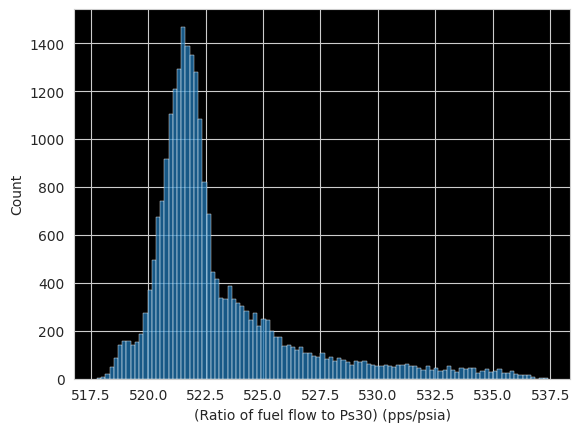

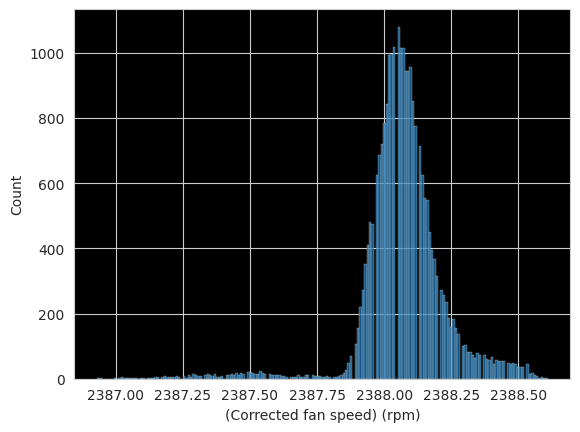

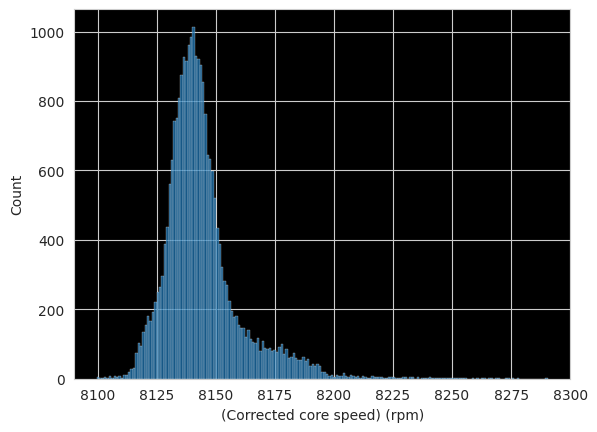

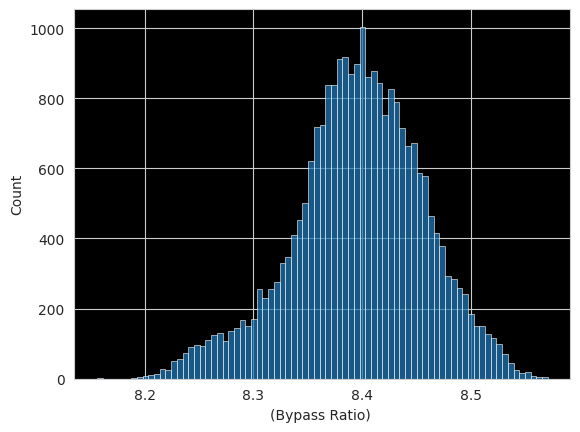

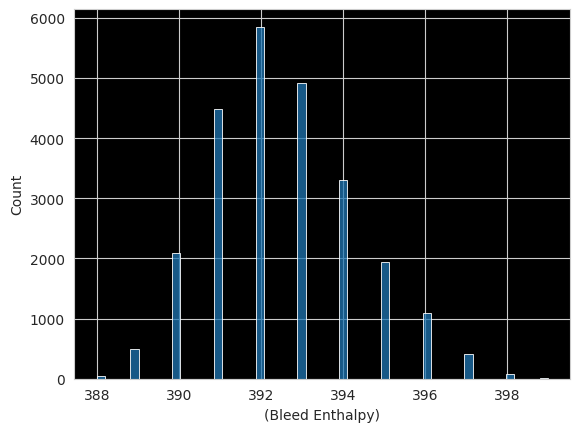

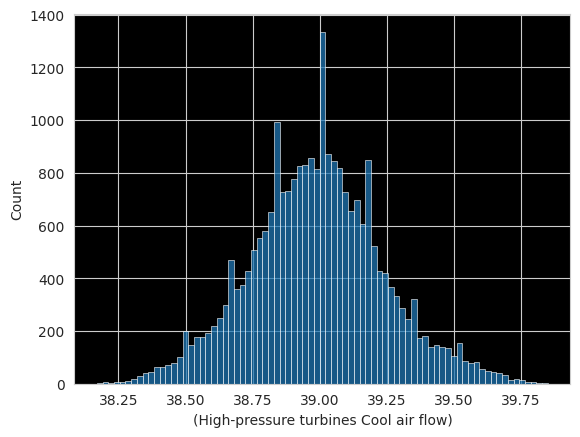

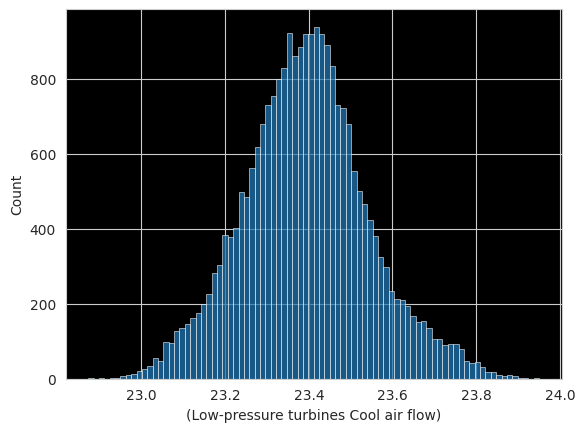

In [30]:
for i in df_train.select_dtypes(include=np.number):
  sns.histplot(df_train[i])
  plt.show()

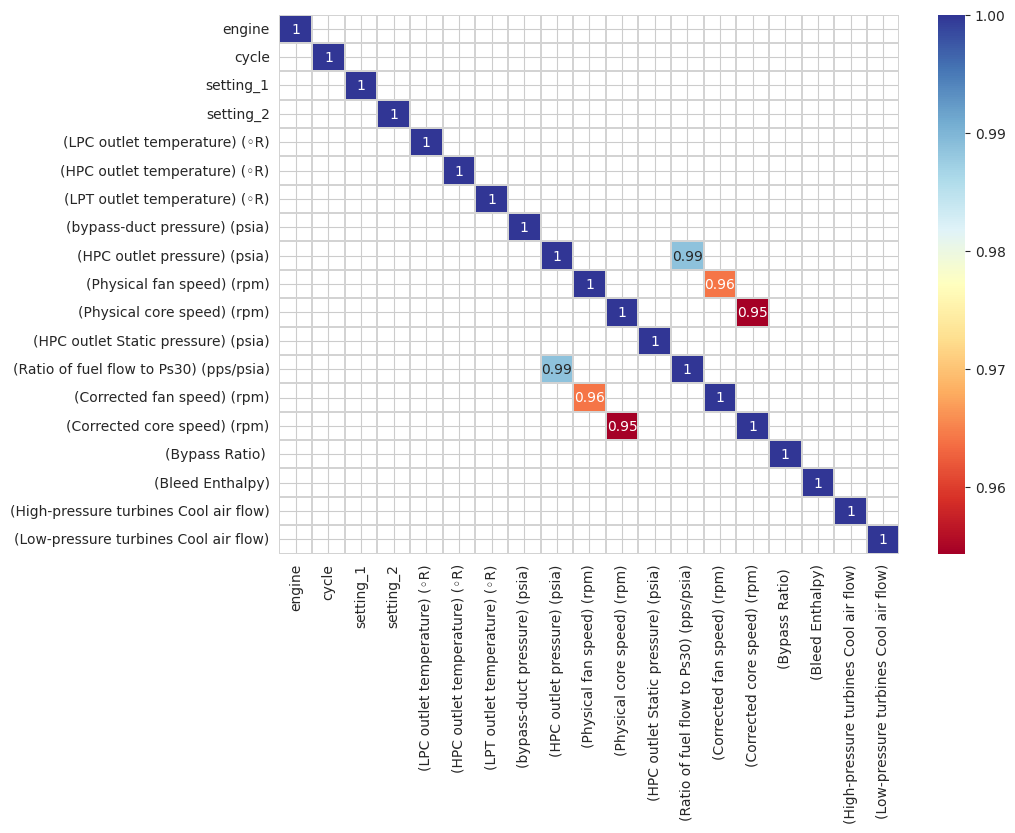

In [31]:
threshold = 0.95 # threshold for co-relation among columns
plt.figure(figsize=(10,7))

sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2, cmap='RdYlBu', annot=True, mask=mask, linewidths=0.2, linecolor='lightgrey').set_facecolor('white')

Drop one of the highly correlated features and keep the other. The threshold for correlation is set at 0.95

In [32]:
df_train.drop(['(HPC outlet pressure) (psia)','(Corrected fan speed) (rpm)', '(Corrected core speed) (rpm)'],axis=1,inplace=True)

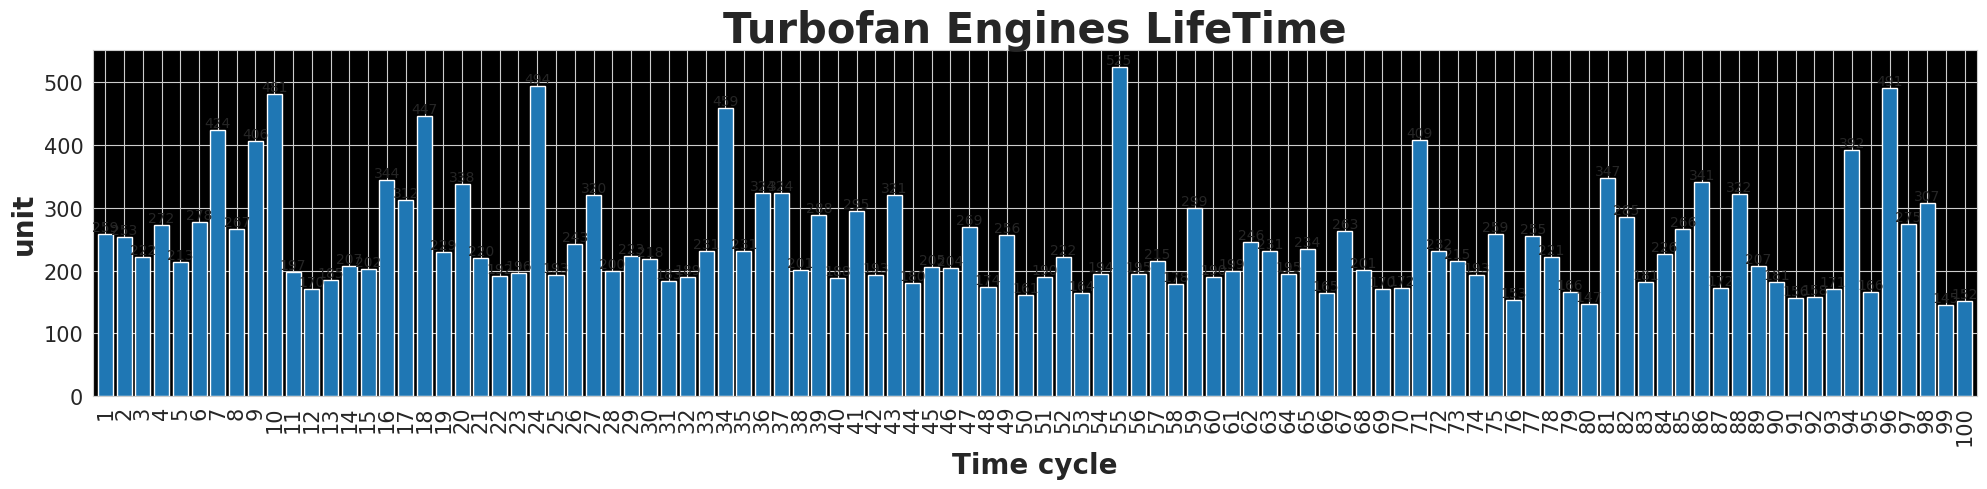

In [33]:
max_time_cycles=df_train[index_names].groupby('engine').max()
plt.figure(figsize=(20,5))
ax=max_time_cycles['cycle'].plot(kind='bar',width=0.8, stacked=True, align='center')
for l in ax.containers:
    ax.bar_label(l)
plt.title('Turbofan Engines LifeTime', fontweight='bold', size=30)
plt.xlabel('Time cycle', fontweight='bold', size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold', size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
df_train['cycle'].max()   # define the maximum life of each engine, as this could be used to obtain the RUL at each point in time of the engine's life

data_train_RUL = df_train.groupby(['engine']).agg({'cycle':'max'})
data_train_RUL.rename(columns={'cycle':'life'},inplace=True)
data_train_RUL

,life
engine,
1,259
2,253
3,222
4,272
5,213
...,...
96,491
97,275
98,307


In [35]:
df_train = df_train.merge(data_train_RUL, how='left', on = ['engine'])

In [36]:
df_train['RUL']= df_train['life'] - df_train['cycle']
df_train.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),life,RUL
0,1,1,-0.0005,0.0004,642.36,1583.23,1396.84,21.61,2387.96,9062.17,47.30,522.31,8.4246,391,39.11,23.3537,259,258
1,1,2,0.0008,-0.0003,642.50,1584.69,1396.89,21.61,2388.00,9061.78,47.23,522.42,8.4403,392,38.99,23.4491,259,257
2,1,3,-0.0014,-0.0002,642.18,1582.35,1405.61,21.61,2388.03,9070.23,47.22,522.03,8.3901,391,38.85,23.3669,259,256
3,1,4,-0.0020,0.0001,642.92,1585.61,1392.27,21.61,2388.00,9064.57,47.24,522.49,8.3878,392,38.96,23.2951,259,255
4,1,5,0.0016,0.0000,641.68,1588.63,1397.65,21.61,2388.04,9076.14,47.15,522.58,8.3869,392,39.14,23.4583,259,254


#Problem Formulation
The challange of this competetion was to predict the Remaining Useful Life of the engine by using the given sensor's data and operational conditions. But, we will try to simplify that by converting it to a Classification Problem, where the class labels will be of 3 types, i.e. Good Condition, Moderate Condition and Warning Condition.

Labels corresponding to each conditions:


1.   Good Condition - 0

2.   Moderate Condition - 1
3.   Warning Condition - 2

Defining the labels:
we will define the engine's condition with Life Ratio (LR), which is the ratio between Current Cycle and the End cycle(end_of_life). If LR=0, that means the component has just started its degradation and LR=1 means, it is completely degraded.

if LR <= 0.6 - Good Condition
if LR <= 0.8 - Moderate Condition
if 0.8 < LR - Warning Condition

In [37]:
df_train["LR"] = df_train["cycle"].div(df_train['life']) #Calculate LR
df_train.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),life,RUL,LR
0,1,1,-0.0005,0.0004,642.36,1583.23,1396.84,21.61,2387.96,9062.17,47.30,522.31,8.4246,391,39.11,23.3537,259,258,0.003861
1,1,2,0.0008,-0.0003,642.50,1584.69,1396.89,21.61,2388.00,9061.78,47.23,522.42,8.4403,392,38.99,23.4491,259,257,0.007722
2,1,3,-0.0014,-0.0002,642.18,1582.35,1405.61,21.61,2388.03,9070.23,47.22,522.03,8.3901,391,38.85,23.3669,259,256,0.011583
3,1,4,-0.0020,0.0001,642.92,1585.61,1392.27,21.61,2388.00,9064.57,47.24,522.49,8.3878,392,38.96,23.2951,259,255,0.015444
4,1,5,0.0016,0.0000,641.68,1588.63,1397.65,21.61,2388.04,9076.14,47.15,522.58,8.3869,392,39.14,23.4583,259,254,0.019305


In [38]:
labels=[]
for i in range (0,len(df_train)):
  if np.array(df_train["LR"])[i] <= 0.6:
    labels.append(0)
  elif np.array(df_train["LR"])[i] <= 0.8:
    labels.append(1)
  else :
    labels.append(2)

df_train["labels"]= labels
df_train.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),life,RUL,LR,labels
0,1,1,-0.0005,0.0004,642.36,1583.23,1396.84,21.61,2387.96,9062.17,47.30,522.31,8.4246,391,39.11,23.3537,259,258,0.003861,0
1,1,2,0.0008,-0.0003,642.50,1584.69,1396.89,21.61,2388.00,9061.78,47.23,522.42,8.4403,392,38.99,23.4491,259,257,0.007722,0
2,1,3,-0.0014,-0.0002,642.18,1582.35,1405.61,21.61,2388.03,9070.23,47.22,522.03,8.3901,391,38.85,23.3669,259,256,0.011583,0
3,1,4,-0.0020,0.0001,642.92,1585.61,1392.27,21.61,2388.00,9064.57,47.24,522.49,8.3878,392,38.96,23.2951,259,255,0.015444,0
4,1,5,0.0016,0.0000,641.68,1588.63,1397.65,21.61,2388.04,9076.14,47.15,522.58,8.3869,392,39.14,23.4583,259,254,0.019305,0


In [39]:
# Dropping these column because we have used them to create label (now these do not have much significance)
# RUL is not deleted becuase we still have ot use it to delte uncessary features
df_train= df_train.drop(columns=['cycle','life','LR'])
df_train.head()

,engine,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL,labels
0,1,-0.0005,0.0004,642.36,1583.23,1396.84,21.61,2387.96,9062.17,47.30,522.31,8.4246,391,39.11,23.3537,258,0
1,1,0.0008,-0.0003,642.50,1584.69,1396.89,21.61,2388.00,9061.78,47.23,522.42,8.4403,392,38.99,23.4491,257,0
2,1,-0.0014,-0.0002,642.18,1582.35,1405.61,21.61,2388.03,9070.23,47.22,522.03,8.3901,391,38.85,23.3669,256,0
3,1,-0.0020,0.0001,642.92,1585.61,1392.27,21.61,2388.00,9064.57,47.24,522.49,8.3878,392,38.96,23.2951,255,0
4,1,0.0016,0.0000,641.68,1588.63,1397.65,21.61,2388.04,9076.14,47.15,522.58,8.3869,392,39.14,23.4583,254,0


RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you areto the true value, the more accurate the model will be

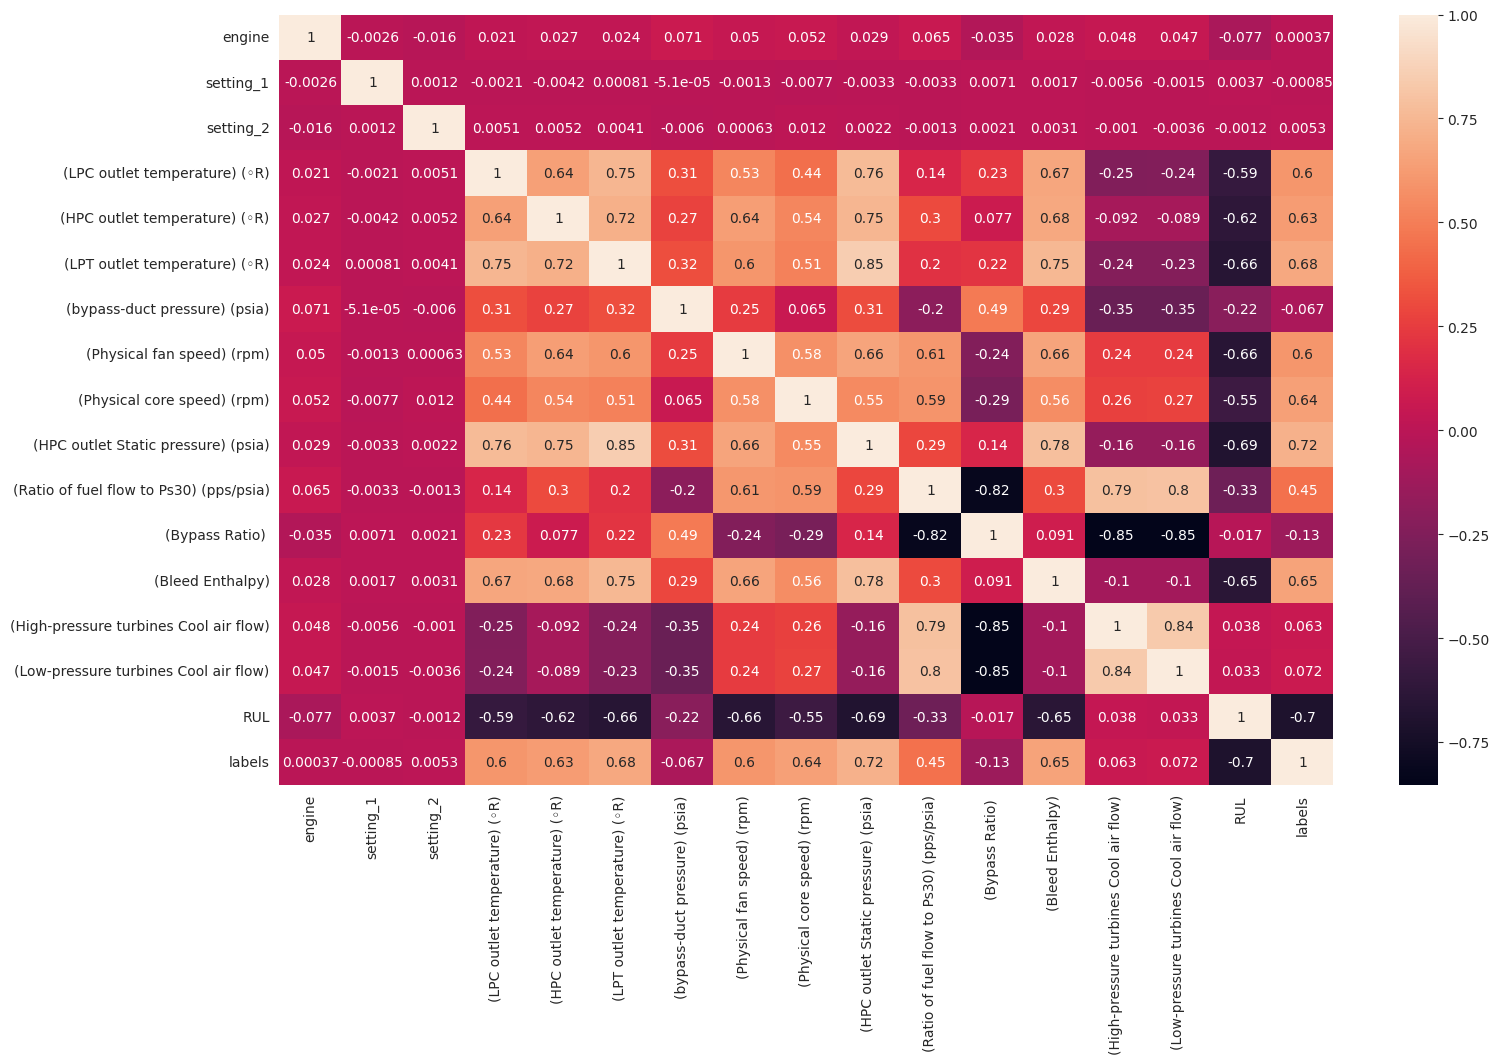

In [40]:
plt.figure(figsize=(17,10))
sns.heatmap(df_train.corr(), annot=True )
plt.show()

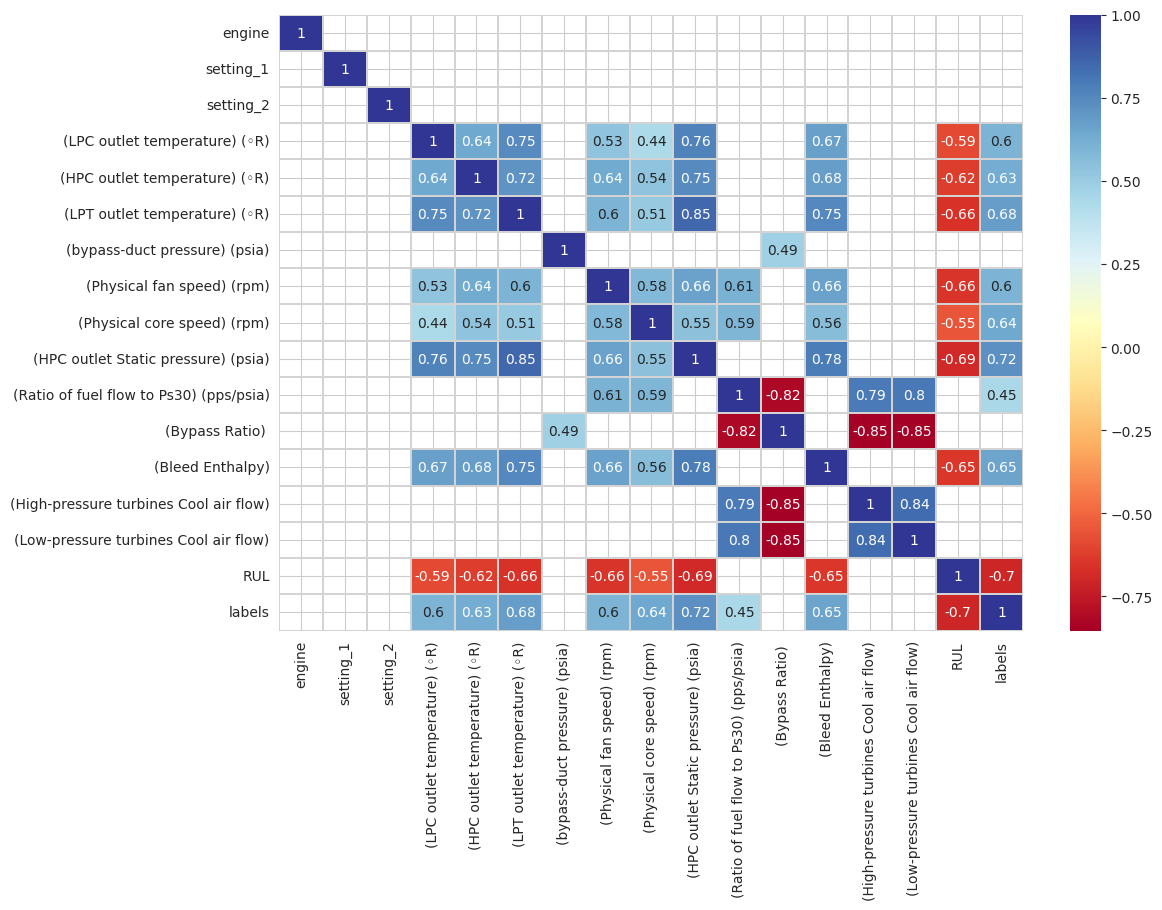

In [41]:
plt.figure(figsize=(12,8))
threshold = 0.4
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2, cmap='RdYlBu', annot=True, mask=mask, linewidths=0.2, linecolor='lightgrey').set_facecolor('white')

according to data the below columns has less correlation with RUL so we can drop these columns


In [42]:
df_train.drop(columns=['engine','setting_1','setting_2', '(bypass-duct pressure) (psia)', '(High-pressure turbines Cool air flow)', '(Low-pressure turbines Cool air flow)'], inplace=True)

In [43]:
Y = df_train["labels"].values
X = df_train.drop(labels = ["labels"], axis=1)

from keras.utils import normalize
X = normalize(X, axis=1)

MinMaxScaler is useful when the data has a bounded range or when the distribution is not Gaussian. For example, in image processing, pixel values are typically in the range of 0-255. Scaling these values using MinMaxScaler ensures that the values are within a fixed range and contributes equally to the analysis.

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (19776, 10)
x_test shape :  (4944, 10)
y_train shape :  (19776,)
y_test shape :  (4944,)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn import metrics

models= [
         ('Logestic Regression',LogisticRegression(max_iter=900)),
         ('SVM',SVC(kernel='linear')),
         ('Random Forest Classifier',RandomForestClassifier()),
         ('KNeighbors Classifier',KNeighborsClassifier()),
         ('Decision Tree', DecisionTreeClassifier()),
         ('AdaBoost Classifier',AdaBoostClassifier()),
         ('XGB Classifier',XGBClassifier()),
         ('LightGBM Classifier',LGBMClassifier()),
         ('GaussianNB',GaussianNB())]

ModelName = []
Train_Acc = []
Test_Acc = []

for name, model in models:
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred  = model.predict(x_test)

    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)

    ModelName.extend([name])
    Train_Acc.extend([train_acc])
    Test_Acc.extend([test_acc])

print(pd.DataFrame({'ModelName': ModelName,
                    'Train_Acc': Train_Acc,
                    'Test_Acc': Test_Acc  }))

                  ModelName  Train_Acc  Test_Acc
0       Logestic Regression   0.887237  0.889563
1                       SVM   0.891232  0.892799
2  Random Forest Classifier   0.999949  0.908981
3     KNeighbors Classifier   0.916414  0.878641
4             Decision Tree   1.000000  0.860032
5       AdaBoost Classifier   0.809921  0.813714
6            XGB Classifier   0.981038  0.901901
7       LightGBM Classifier   0.959041  0.905744
8                GaussianNB   0.832221  0.831108


In [47]:
df_train['labels'].value_counts()

0    14793
2     4985
1     4942
Name: labels, dtype: int64

#Handling Imbalance dataset

In [48]:
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X, Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0 1 2] [14793  4942  4985]
After SMOTE:  [0 1 2] [14793 14793 14793]


LOGISTIC REGRESSION


In [49]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smote, y_train_smote)
LR_prediction_smote = model_LR.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, LR_prediction_smote)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smote, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, LR_prediction_smote)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, LR_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, LR_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy: 0.701216764308247

Count of predicted label: [0 1 2] [2959 1372 4545]

Confusion Metrics: 
 [[2470  443   54]
 [ 489  860 1597]
 [   0   69 2894]]

Precision Values for:  0.6996358173373319
Recall Values for:  0.701216764308247
F-Measure Values for:  0.7004253987255918


RANDOM FOREST

In [50]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)

RF_prediction_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, RF_prediction_smote))
print()

(unique, counts) = np.unique(RF_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, RF_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, RF_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, RF_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9356692203695358

Count of predicted labels:  [0 1 2] [2906 3084 2886]

Confusion Metrics after SMOTE: 
 [[2743  224    0]
 [ 162 2730   54]
 [   1  130 2832]]

Precision Values for:  0.9369060586804113
Recall Values for:  0.9356692203695358
F-Measure Values for:  0.936287231058349


KNN

In [51]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smote, y_train_smote)

KNN_prediction_smote = model_KNN.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, KNN_prediction_smote))
print()

(unique, counts) = np.unique(KNN_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, KNN_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, KNN_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, KNN_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.912009914375845

Count of predicted labels:  [0 1 2] [2672 3281 2923]

Confusion Metrics after SMOTE: 
 [[2527  438    2]
 [ 143 2725   78]
 [   2  118 2843]]

Precision Values for:  0.916478808497419
Recall Values for:  0.912009914375845
F-Measure Values for:  0.9142389003653058


Decision Tree


In [52]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smote, y_train_smote)

DT_prediction_smote = model_DT.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, DT_prediction_smote))
print()

(unique, counts) = np.unique(DT_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, DT_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, DT_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, DT_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.902433528616494

Count of predicted labels:  [0 1 2] [2919 2983 2974]

Confusion Metrics after SMOTE: 
 [[2648  319    0]
 [ 270 2532  144]
 [   1  132 2830]]

Precision Values for:  0.902621713406991
Recall Values for:  0.902433528616494
F-Measure Values for:  0.9025276112022046


ADABOOST

In [53]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smote, y_train_smote)

AdaBoost_prediction_smote = model_AdaBoost.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, AdaBoost_prediction_smote))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, AdaBoost_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, AdaBoost_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, AdaBoost_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.6613339342045966

Count of predicted labels:  [0 1 2] [2831 4204 1841]

Confusion Metrics after SMOTE: 
 [[2334  633    0]
 [ 495 2073  378]
 [   2 1498 1463]]

Precision Values for:  0.7045324064782205
Recall Values for:  0.6613339342045966
F-Measure Values for:  0.6822500478603896


XGBoost

In [54]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smote, y_train_smote)

XGB_prediction_smote = model_XGB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, XGB_prediction_smote))
print()

(unique, counts) = np.unique(XGB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, XGB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, XGB_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, XGB_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9237269040108157

Count of predicted labels:  [0 1 2] [2927 3071 2878]

Confusion Metrics after SMOTE: 
 [[2722  245    0]
 [ 205 2670   71]
 [   0  156 2807]]

Precision Values for:  0.9250139251205275
Recall Values for:  0.9237269040108157
F-Measure Values for:  0.9243699665787741


LIGHT GBM

In [55]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smote, y_train_smote)

LGBM_prediction_smote = model_LGBM.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, LGBM_prediction_smote))
print()

(unique, counts) = np.unique(LGBM_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, LGBM_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, LGBM_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, LGBM_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9186570527264534

Count of predicted labels:  [0 1 2] [2916 3080 2880]

Confusion Metrics after SMOTE: 
 [[2701  266    0]
 [ 215 2652   79]
 [   0  162 2801]]

Precision Values for:  0.9200747808746986
Recall Values for:  0.9186570527264534
F-Measure Values for:  0.9193653702409675


Gaussian Naive Bayes

In [56]:
model_NB = GaussianNB()
model_NB.fit(X_train_smote, y_train_smote)

NB_prediction_smote = model_NB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, NB_prediction_smote))
print()

(unique, counts) = np.unique(NB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, NB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, NB_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, NB_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.8048670572329878

Count of predicted labels:  [0 1 2] [2736 3225 2915]

Confusion Metrics after SMOTE: 
 [[2340  616   11]
 [ 396 2225  325]
 [   0  384 2579]]

Precision Values for:  0.8102235979948869
Recall Values for:  0.8048670572329878
F-Measure Values for:  0.807536444976656


#SMOTE-ENN

In [57]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTEENN: ", unique2, counts2)

X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0 1 2] [14793  4942  4985]
After SMOTEENN:  [0 1 2] [11296 12474 14074]


LOGISTIC REGRESSION


Accuracy: 0.6664024309684239

Count of predicted label: [0 1 2] [2114  541 4914]

Confusion Metrics: 
 [[1907  256   90]
 [ 207  285 1972]
 [   0    0 2852]]

Precision Values for:  0.6586974625514112
Recall Values for:  0.6664024309684239
F-Measure Values for:  0.6625275459814565


<Axes: >

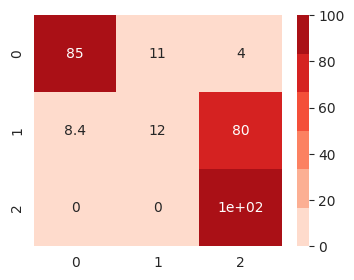

In [58]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteenn, y_train_smoteenn)
LR_prediction_smoteenn = model_LR.predict(X_test_smoteenn)

accuracy = metrics.accuracy_score(y_test_smoteenn, LR_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteenn, LR_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, LR_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, LR_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, LR_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

RANDOM FOREST

Accuracy: 0.9704056017968028

Count of predicted label: [0 1 2] [2263 2494 2812]

Confusion Metrics: 
 [[2199   54    0]
 [  64 2367   33]
 [   0   73 2779]]

Precision Values for:  0.9705827797651985
Recall Values for:  0.9704056017968028
F-Measure Values for:  0.9704941826943905


<Axes: >

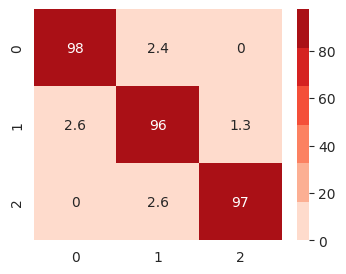

In [59]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteenn, y_train_smoteenn)

RF_prediction_smoteenn = model_RF.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, RF_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(RF_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, RF_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, RF_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, RF_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, RF_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

KNN

Accuracy: 0.9782005548949663

Count of predicted label: [0 1 2] [2203 2528 2838]

Confusion Metrics: 
 [[2175   77    1]
 [  28 2414   22]
 [   0   37 2815]]

Precision Values for:  0.9784829064231286
Recall Values for:  0.9782005548949663
F-Measure Values for:  0.9783417102872329


<Axes: >

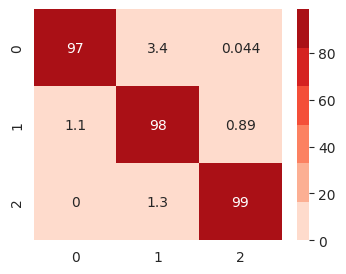

In [60]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smoteenn, y_train_smoteenn)

KNN_prediction_smoteenn = model_KNN.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, KNN_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(KNN_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, KNN_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, KNN_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, KNN_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, KNN_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Decision Tree


Accuracy: 0.9540229885057471

Count of predicted label: [0 1 2] [2244 2506 2819]

Confusion Metrics: 
 [[2155   98    0]
 [  89 2311   64]
 [   0   97 2755]]

Precision Values for:  0.954308627653362
Recall Values for:  0.9540229885057471
F-Measure Values for:  0.9541657867023153


<Axes: >

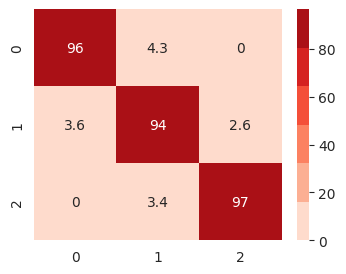

In [61]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteenn, y_train_smoteenn)

DT_prediction_smoteenn = model_DT.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, DT_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(DT_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, DT_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, DT_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, DT_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, DT_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

ADABOOST

Accuracy: 0.7672083498480645

Count of predicted label: [0 1 2] [2641 1698 3230]

Confusion Metrics: 
 [[2173   80    0]
 [ 468 1200  796]
 [   0  418 2434]]

Precision Values for:  0.7589183128654003
Recall Values for:  0.7672083498480645
F-Measure Values for:  0.7630408152986446


<Axes: >

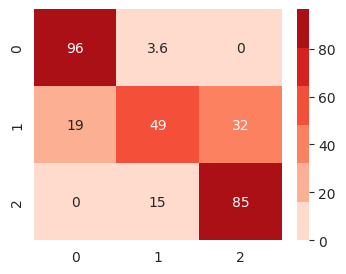

In [62]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteenn, y_train_smoteenn)

AdaBoost_prediction_smoteenn = model_AdaBoost.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, AdaBoost_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, AdaBoost_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, AdaBoost_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, AdaBoost_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, AdaBoost_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

XGBoost

Accuracy: 0.9705377196459242

Count of predicted label: [0 1 2] [2260 2493 2816]

Confusion Metrics: 
 [[2199   54    0]
 [  61 2367   36]
 [   0   72 2780]]

Precision Values for:  0.9706955231538499
Recall Values for:  0.9705377196459242
F-Measure Values for:  0.9706166149859368


<Axes: >

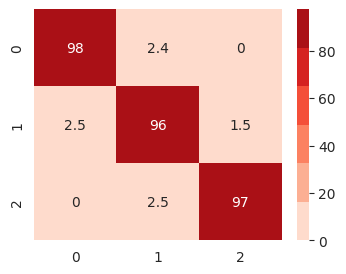

In [63]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteenn, y_train_smoteenn)

XGB_prediction_smoteenn = model_XGB.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, XGB_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(XGB_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, XGB_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, XGB_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, XGB_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, XGB_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

LIGHT GBM

Accuracy: 0.9649887699828247

Count of predicted label: [0 1 2] [2263 2491 2815]

Confusion Metrics: 
 [[2190   63    0]
 [  73 2345   46]
 [   0   83 2769]]

Precision Values for:  0.9651605838970925
Recall Values for:  0.9649887699828247
F-Measure Values for:  0.9650746692928766


<Axes: >

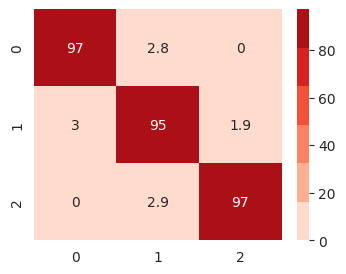

In [64]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smoteenn, y_train_smoteenn)

LGBM_prediction_smoteenn = model_LGBM.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, LGBM_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LGBM_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, LGBM_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, LGBM_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, LGBM_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, LGBM_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Gaussian Naive Bayes

Accuracy: 0.8422512881490289

Count of predicted label: [0 1 2] [2151 2659 2759]

Confusion Metrics: 
 [[1932  314    7]
 [ 219 1968  277]
 [   0  377 2475]]

Precision Values for:  0.8463095646542287
Recall Values for:  0.8422512881490289
F-Measure Values for:  0.8442755495835487


<Axes: >

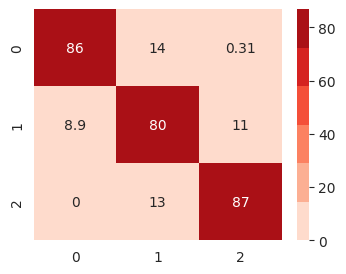

In [65]:
model_NB = GaussianNB()
model_NB.fit(X_train_smoteenn, y_train_smoteenn)

NB_prediction_smoteenn = model_NB.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, NB_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(NB_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, NB_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, NB_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, NB_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, NB_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

#SMOTE-Tomek

In [66]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTE-tomek: ", unique2, counts2)

X_train_smoteTomek, X_test_smoteTomek, y_train_smoteTomek, y_test_smoteTomek = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0 1 2] [14793  4942  4985]
After SMOTE-tomek:  [0 1 2] [14632 14618 14771]


Logistic Regression

Accuracy of Logistic Regression after SMOTETomek: 0.7011925042589437

Count of predicted label: [0 1 2] [2958 1219 4628]

Confusion Metrics: 
 [[2481  371   55]
 [ 477  777 1657]
 [   0   71 2916]]

Precision Values for:  0.7013924288761464
Recall Values for:  0.7011925042589437
F-Measure Values for:  0.7012924523189061


<Axes: >

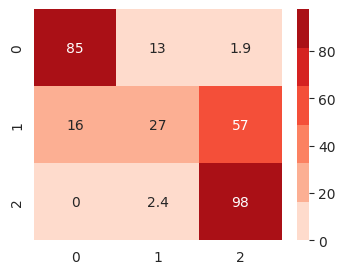

In [67]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteTomek, y_train_smoteTomek)
LR_prediction_smoteTomek = model_LR.predict(X_test_smoteTomek)

accuracy = metrics.accuracy_score(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Accuracy of Logistic Regression after SMOTETomek:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteTomek, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, LR_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, LR_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, LR_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

RANDOM FOREST

Accuracy of Random Forest after SMOTETomek =  0.9375354911981828

Count of predicted labels:  [0 1 2] [2878 3004 2923]

Confusion Metrics after SMOTETomek: 
 [[2710  197    0]
 [ 167 2683   61]
 [   1  124 2862]]

Precision Values for:  0.9383201923135082
Recall Values for:  0.9375354911981828
F-Measure Values for:  0.9379276776291897


<Axes: >

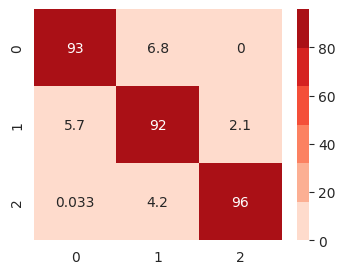

In [68]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteTomek, y_train_smoteTomek)

RF_prediction_smoteTomek = model_RF.predict(X_test_smoteTomek)
print ("Accuracy of Random Forest after SMOTETomek = ", metrics.accuracy_score(y_test_smoteTomek, RF_prediction_smoteTomek))
print()

(unique, counts) = np.unique(RF_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, RF_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, RF_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, RF_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, RF_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

KNN

Accuracy =  0.9187961385576378

Count of predicted labels:  [0 1 2] [2643 3202 2960]

Confusion Metrics after SMOTETomek: 
 [[2504  402    1]
 [ 138 2700   73]
 [   1  100 2886]]

Precision Values for:  0.9223240078030722
Recall Values for:  0.9187961385576378
F-Measure Values for:  0.920556693210439


<Axes: >

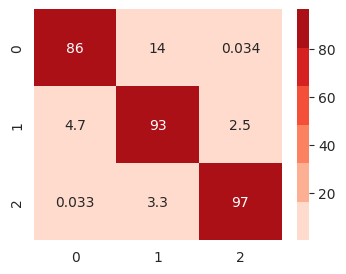

In [69]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smoteTomek, y_train_smoteTomek)

KNN_prediction_smoteTomek = model_KNN.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, KNN_prediction_smoteTomek))
print()

(unique, counts) = np.unique(KNN_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, KNN_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, KNN_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, KNN_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, KNN_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Decision Tree

Accuracy =  0.903236797274276

Count of predicted labels:  [0 1 2] [2817 2984 3004]

Confusion Metrics after SMOTETomek: 
 [[2568  335    4]
 [ 248 2524  139]
 [   1  125 2861]]

Precision Values for:  0.9037032747266897
Recall Values for:  0.903236797274276
F-Measure Values for:  0.9034699757878568


<Axes: >

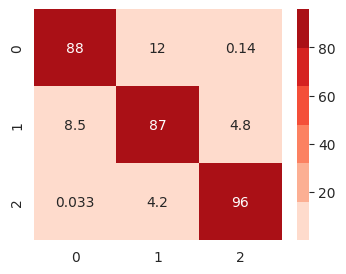

In [70]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteTomek, y_train_smoteTomek)

DT_prediction_smoteTomek = model_DT.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, DT_prediction_smoteTomek))
print()

(unique, counts) = np.unique(DT_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, DT_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, DT_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, DT_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, DT_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

AdaBoost

Accuracy =  0.7067575241340147

Count of predicted labels:  [0 1 2] [2202 3881 2722]

Confusion Metrics after SMOTETomek: 
 [[1858 1049    0]
 [ 344 2105  462]
 [   0  727 2260]]

Precision Values for:  0.7395538216160654
Recall Values for:  0.7067575241340147
F-Measure Values for:  0.7227838313861061


<Axes: >

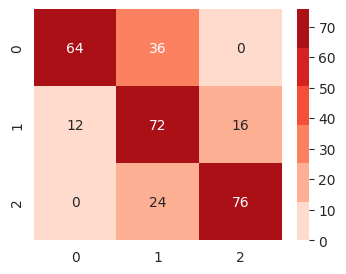

In [71]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteTomek, y_train_smoteTomek)

AdaBoost_prediction_smoteTomek = model_AdaBoost.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, AdaBoost_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

XGBOOST

Accuracy =  0.9273140261215219

Count of predicted labels:  [0 1 2] [2883 2996 2926]

Confusion Metrics after SMOTETomek: 
 [[2688  219    0]
 [ 194 2634   83]
 [   1  143 2843]]

Precision Values for:  0.9280995687483024
Recall Values for:  0.9273140261215219
F-Measure Values for:  0.9277066311438975


<Axes: >

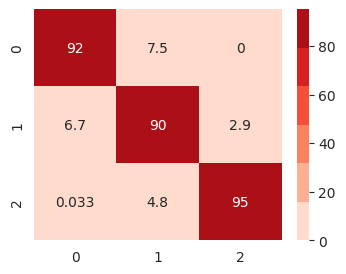

In [72]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteTomek, y_train_smoteTomek)

XGB_prediction_smoteTomek = model_XGB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, XGB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(XGB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, XGB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, XGB_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, XGB_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, XGB_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Light GBM

Accuracy =  0.9223168654173765

Count of predicted labels:  [0 1 2] [2865 3018 2922]

Confusion Metrics after SMOTETomek: 
 [[2668  239    0]
 [ 196 2623   92]
 [   1  156 2830]]

Precision Values for:  0.9233469399102601
Recall Values for:  0.9223168654173765
F-Measure Values for:  0.9228316152188736


<Axes: >

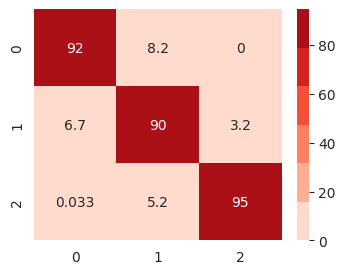

In [73]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smoteTomek, y_train_smoteTomek)

LGBM_prediction_smoteTomek = model_LGBM.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, LGBM_prediction_smoteTomek))
print()

(unique, counts) = np.unique(LGBM_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, LGBM_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, LGBM_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, LGBM_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, LGBM_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

GAUSSIAN MAIVE BAYES

Accuracy =  0.8057921635434412

Count of predicted labels:  [0 1 2] [2698 3127 2980]

Confusion Metrics after SMOTETomek: 
 [[2331  564   12]
 [ 367 2170  374]
 [   0  393 2594]]

Precision Values for:  0.8099681139789939
Recall Values for:  0.8057921635434412
F-Measure Values for:  0.8078747423660089


<Axes: >

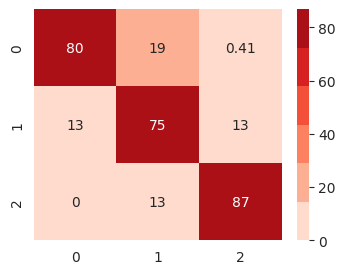

In [74]:
model_NB = GaussianNB()
model_NB.fit(X_train_smoteTomek, y_train_smoteTomek)

NB_prediction_smoteTomek = model_NB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, NB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(NB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, NB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, NB_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, NB_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, NB_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

#ANN

In [75]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

In [76]:
import tensorflow as tf

In [77]:
ann = tf.keras.models.Sequential()

In [78]:
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
# ann2.add(tf.keras.layers.Dense(units=250, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [79]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [80]:
ann.fit(x_train, y_train ,batch_size = 32, epochs = 10,verbose=2)

Epoch 1/10
618/618 - 2s - loss: 0.1203 - 2s/epoch - 3ms/step
Epoch 2/10
618/618 - 1s - loss: 0.0860 - 885ms/epoch - 1ms/step
Epoch 3/10
618/618 - 1s - loss: 0.0833 - 912ms/epoch - 1ms/step
Epoch 4/10
618/618 - 1s - loss: 0.0822 - 848ms/epoch - 1ms/step
Epoch 5/10
618/618 - 1s - loss: 0.0822 - 1s/epoch - 2ms/step
Epoch 6/10
618/618 - 1s - loss: 0.0810 - 1s/epoch - 2ms/step
Epoch 7/10
618/618 - 1s - loss: 0.0800 - 944ms/epoch - 2ms/step
Epoch 8/10
618/618 - 1s - loss: 0.0791 - 921ms/epoch - 1ms/step
Epoch 9/10
618/618 - 1s - loss: 0.0788 - 862ms/epoch - 1ms/step
Epoch 10/10
618/618 - 1s - loss: 0.0782 - 885ms/epoch - 1ms/step


In [81]:
ann_pred = ann.predict(x_test)

155/155 [==============================] - 0s 932us/step


In [82]:
from sklearn.metrics import r2_score,mean_squared_error

In [83]:
mse = mean_squared_error(y_test, ann_pred) # evaluate the performance of the model
rmse = np.sqrt(mse)
r2 = r2_score(y_test,ann_pred)
print(mse)
print(rmse)
print(r2)

0.07705699701766575
0.2775914210087656
0.877813873485804
